In [ ]:
import numpy as np

# data processing
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.datasets import dump_svmlight_file
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV # To get probabilities for LinearSVC
from sklearn import metrics
import scipy.stats as stats
from scipy.stats import randint as sp_randint
import random

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_original = pd.read_csv('/content/Student_academic.csv')

In [ ]:
df_original.head(5)

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [ ]:
df_original.rename(columns={"Nacionality": "Nationality"}, inplace=True)

In [ ]:
df_original.head(5)

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nationality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [ ]:
df_original.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
df_original.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

This machine learning model is predicting a very interesting question: Using ca 3600 (all the data minus ca 800 enrolled students we will test on) rows of data, are we able to train a model to see what the most important factors are in order to predict whether or not a student will graduate university or drop out? Can it all be distilled down to just a few key factors?

And this is coming from someone who has dropped out of Uni twice so I can share some of my experiences on this as well! I can aleardy now imagine that a lot of outside factors won't be on here that are mental health related. Is the person getting a good night's sleep on a regular basis? Are they getting their emotional needs met? Do they have a good support net? etc. etc.

In [ ]:
df_original['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

The 794 Enrolled values is the small subset of students we want to make predictions on using our models later after we have trained them. So let's separate this from the original dataset and save for later. I will call what's remainging df for convenience, renaming the oringal df oringinal_df, and the test set df_test

In [ ]:
df = df_original.loc[(df_original['Target'] == 'Graduate') |
 (df_original['Target'] == 'Dropout')]
df.reset_index(inplace= True)
df.drop(['index'], axis=1, inplace= True)
df_test = df_original.loc[(df_original['Target'] == 'Enrolled')]
df_test.reset_index(inplace= True)
df_test.drop(['index', 'Target'], axis=1, inplace= True)

In [ ]:
df_before_feature_engineering = df
df_before_feature_engineering

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
3625               1                 1                  6      15   
3626               1                 1                  2      15   
3627               1                 1                  1      12   
3628               1                 1                  1       9   
3629               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nationality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
3625                           1                       1            1   
3626                           1                       1           19   
3627                           1                       1            1   
3628                           1                       1            1   
3629                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
3625                       1                       1                    6   
3626                       1                       1                   10   
3627                      22                      27                   10   
3628                      22                      27                    8   
3629                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
3625  ...                                    0   
3626  ...                                    0   
3627  ...                                    0   
3628  ...                                    0   
3629  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
3625                                    6   
3626                                    6   
3627                                    8   
3628                                    5   
3629                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

In [ ]:
df_test

Marital status  Application mode  Application order  Course  \
0                 1                 9                  1      10   
1                 1                 1                  1      16   
2                 1                 9                  4      13   
3                 1                 1                  1      10   
4                 1                 1                  1       6   
..              ...               ...                ...     ...   
789               1                 3                  4      16   
790               1                 9                  2      16   
791               1                 1                  1       5   
792               1                14                  1       5   
793               1                14                  1       1   

     Daytime/evening attendance  Previous qualification  Nationality  \
0                             1                       1            1   
1                             1                       1            1   
2                             1                       1            1   
3                             1                       1            1   
4                             1                       1            1   
..                          ...                     ...          ...   
789                           1                       1            1   
790                           1                       1            1   
791                           1                       1            1   
792                           1                       1            1   
793                           1                       1            1   

     Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                        13                      28                    6  ...   
1                        13                      14                    8  ...   
2                         1                      28                    5  ...   
3                        13                      28                   10  ...   
4                        13                      14                    4  ...   
..                      ...                     ...                  ...  ...   
789                       3                      28                    4  ...   
790                       1                      14                    4  ...   
791                       1                      28                    6  ...   
792                      13                      14                    8  ...   
793                      22                       1                   10  ...   

     Curricular units 1st sem (without evaluations)  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 2   
..                                              ...   
789                                               0   
790                                               0   
791                                               0   
792                                               0   
793                                               0   

     Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                      0                                    6   
1                                      0                                    7   
2                                      0                                    8   
3                                      0                                    6   
4                                      0                                    5   
..                                   ...                                  ...   
789                                    0                                    6   
790                                    0 

Everything is numbers except Target, meaning that we don't have to do any Encoding except for this column. Let's map it so that Dropout is 0 and Graduate is 1

In [ ]:
# df.Target.replace({'Dropout' : 0, 'Graduate' : 1}, inplace= True)
labelencoder = LabelEncoder()
df['Target'] = labelencoder.fit_transform(df['Target'])

In [ ]:
df['Target'].value_counts()

1    2209
0    1421
Name: Target, dtype: int64

Since we have so much data, I will choose to just create a model and from there look at a correlation matrix and the feature importance, and make improvements to both the dataset and the model from there. For now we will visualize the data, split it using train_test_split and standardize it:

Marital status


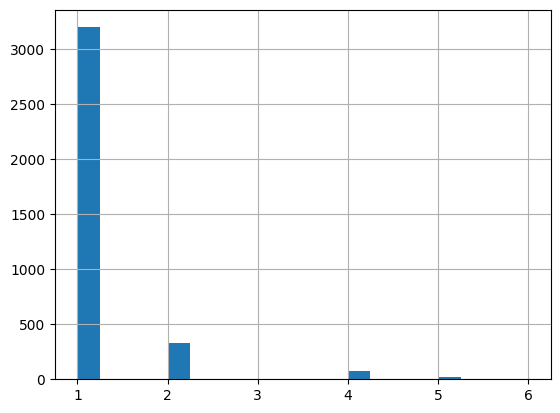

Application mode


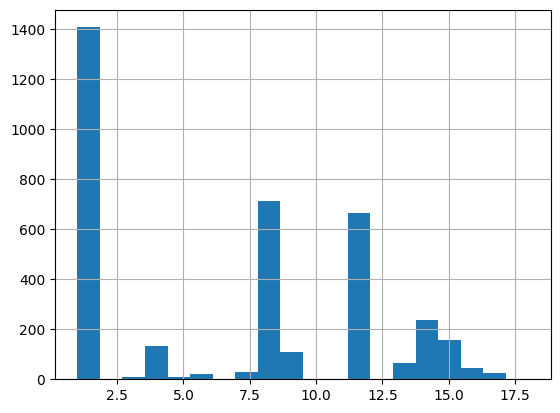

Application order


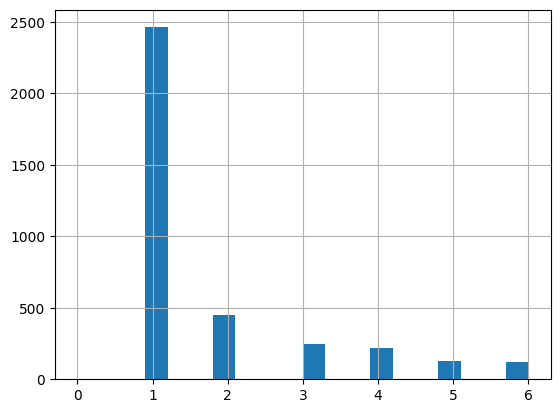

Course


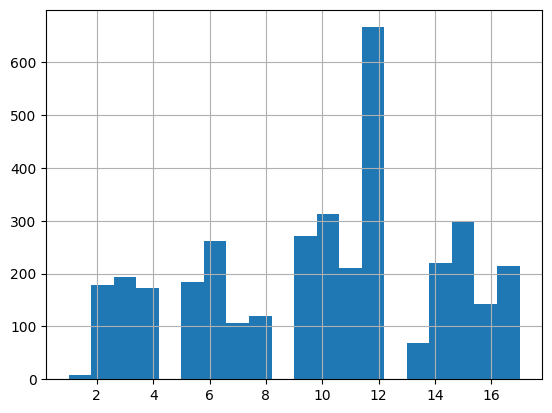

Daytime/evening attendance


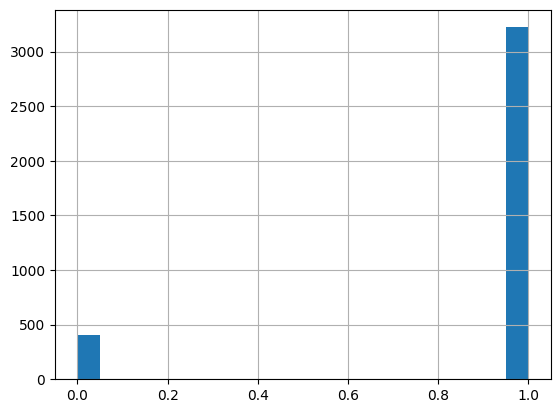

Previous qualification


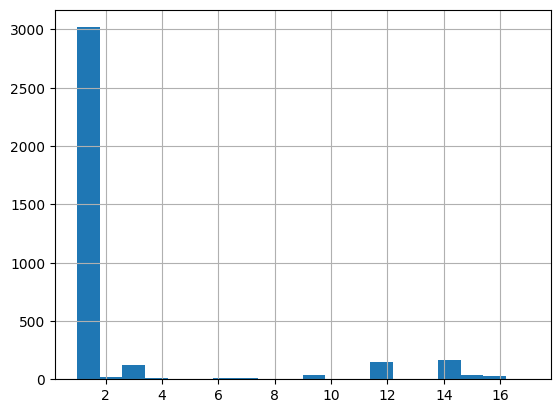

Nationality


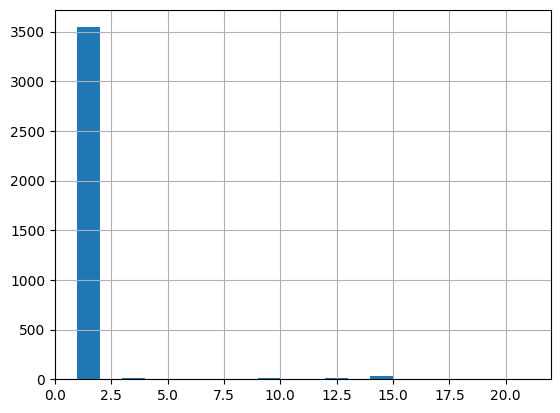

Mother's qualification


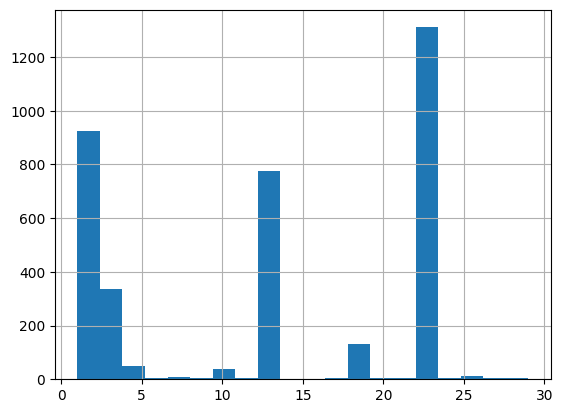

Father's qualification


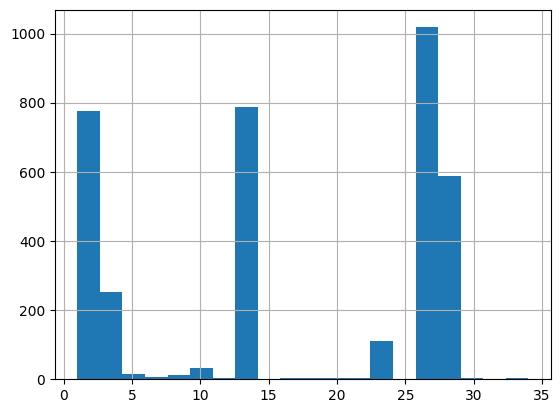

Mother's occupation


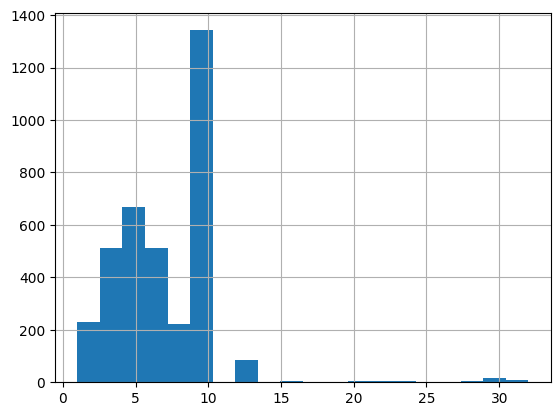

Father's occupation


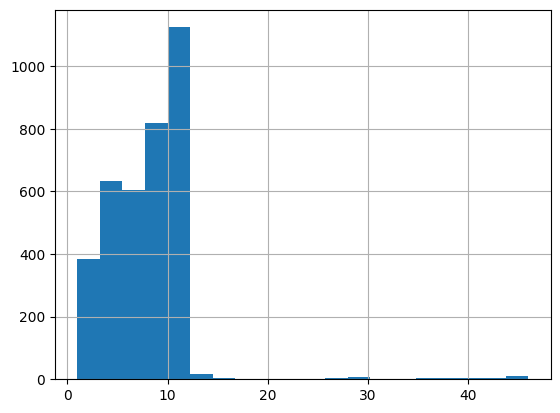

Displaced


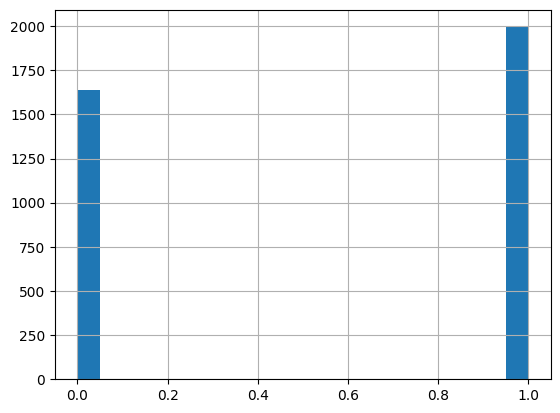

Educational special needs


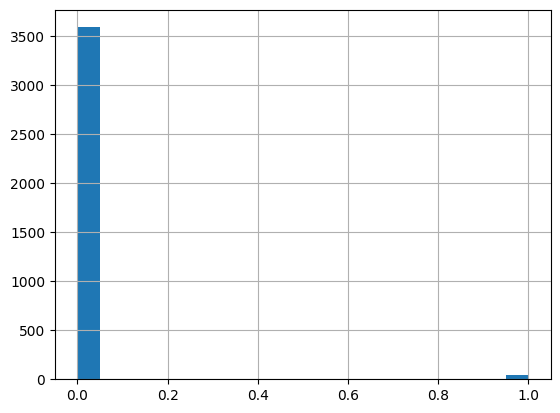

Debtor


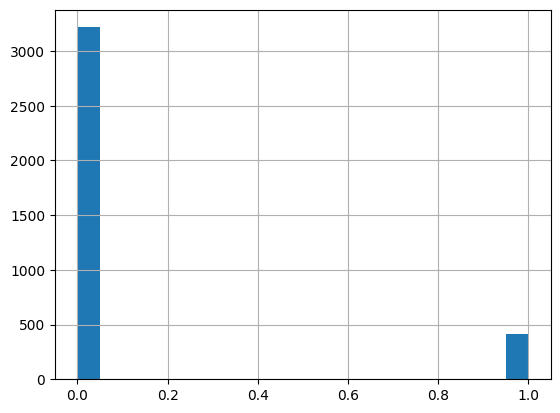

Tuition fees up to date


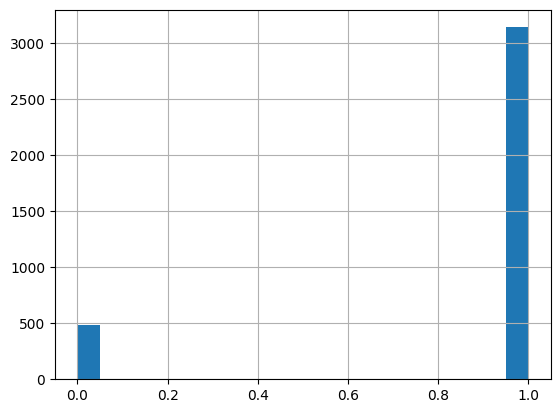

Gender


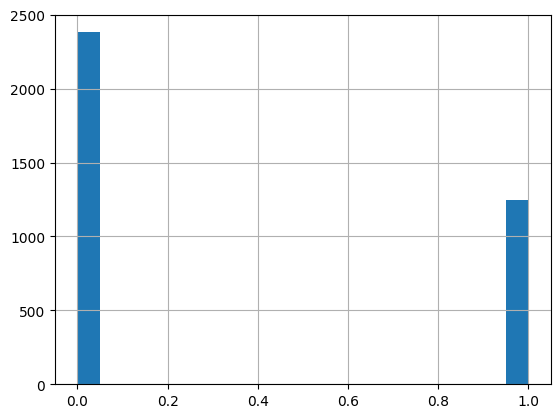

Scholarship holder


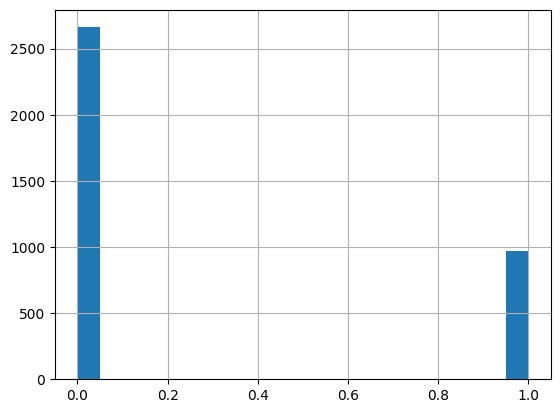

Age at enrollment


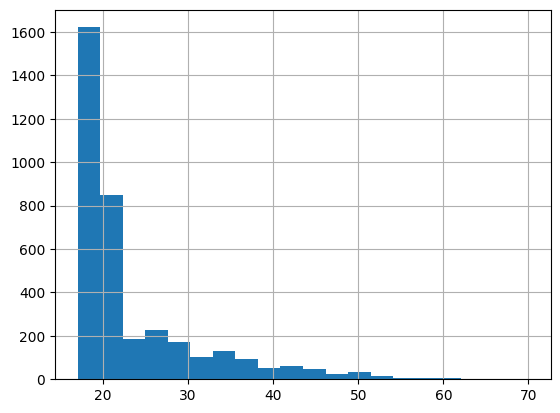

International


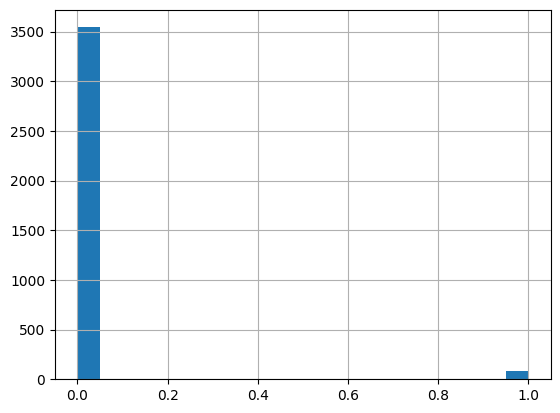

Curricular units 1st sem (credited)


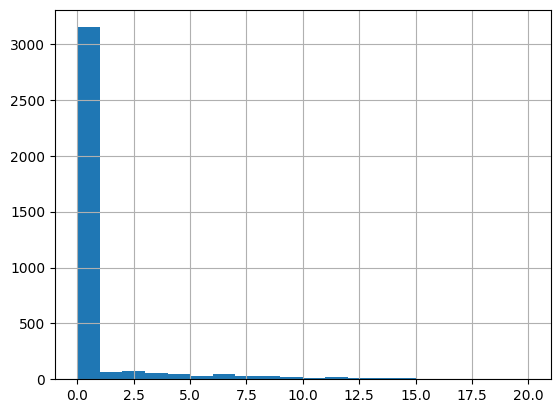

Curricular units 1st sem (enrolled)


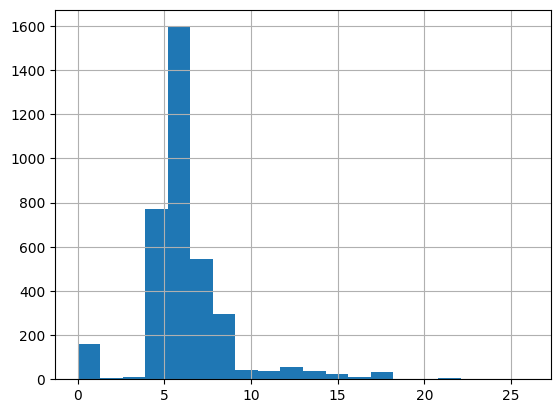

Curricular units 1st sem (evaluations)


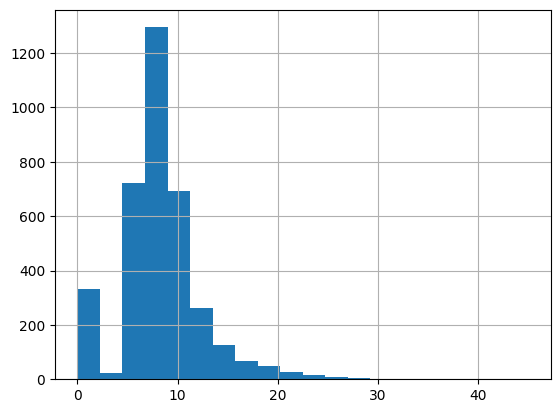

Curricular units 1st sem (approved)


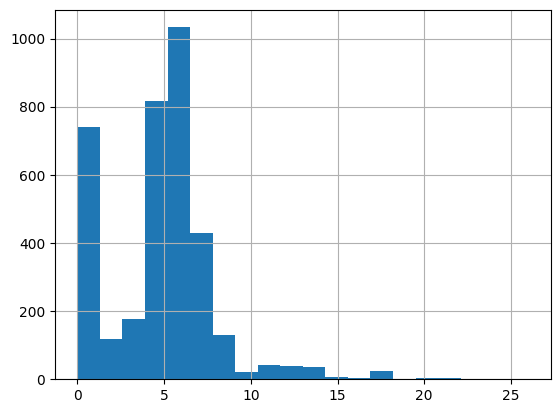

Curricular units 1st sem (grade)


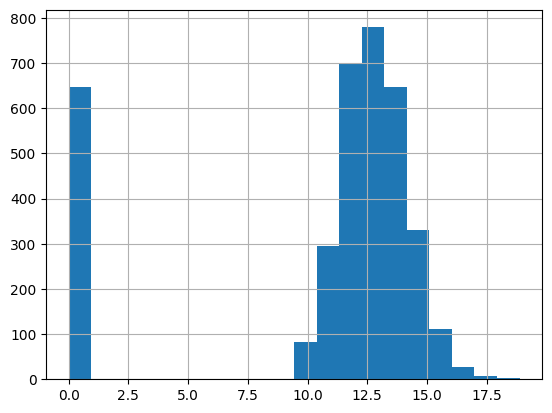

Curricular units 1st sem (without evaluations)


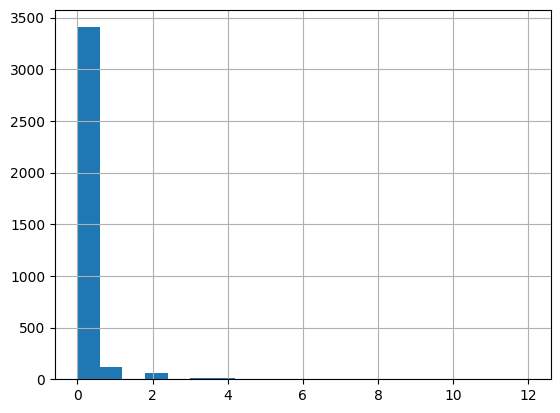

Curricular units 2nd sem (credited)


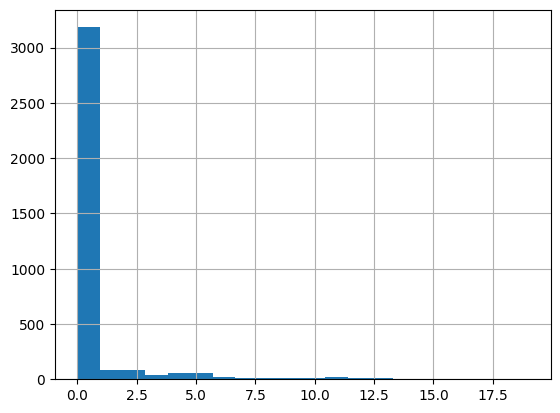

Curricular units 2nd sem (enrolled)


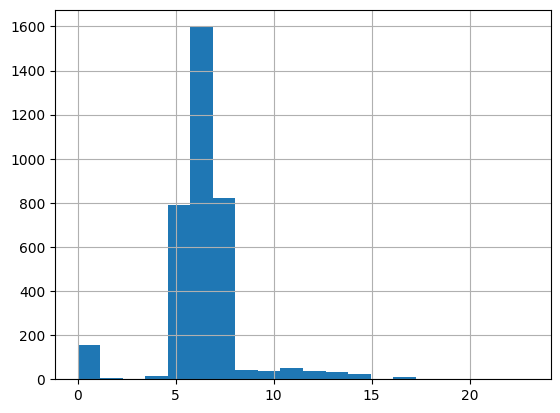

Curricular units 2nd sem (evaluations)


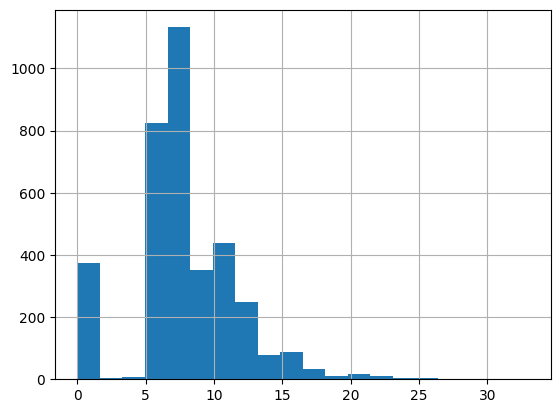

Curricular units 2nd sem (approved)


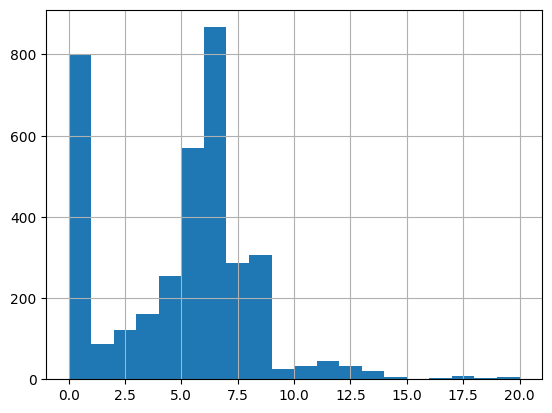

Curricular units 2nd sem (grade)


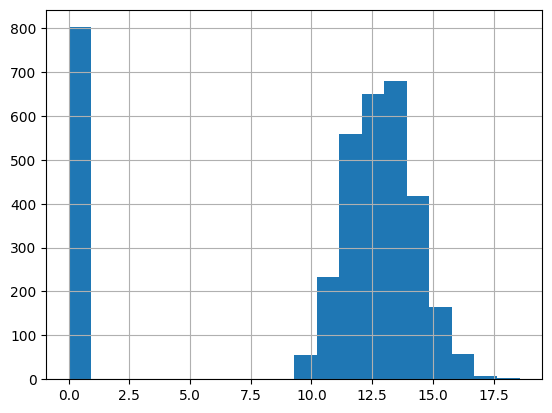

Curricular units 2nd sem (without evaluations)


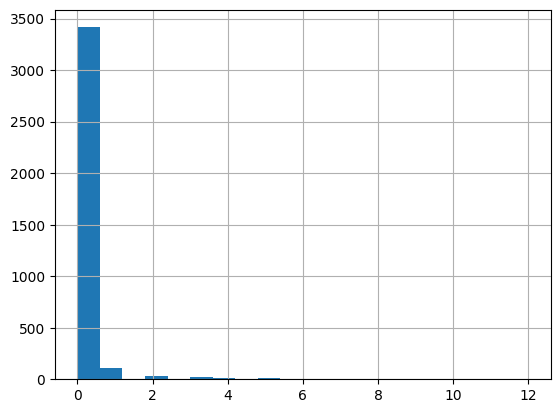

Unemployment rate


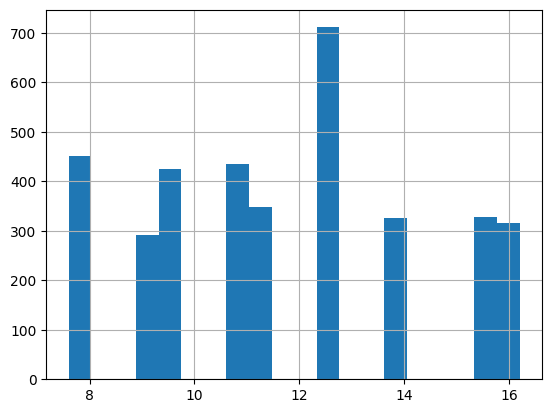

Inflation rate


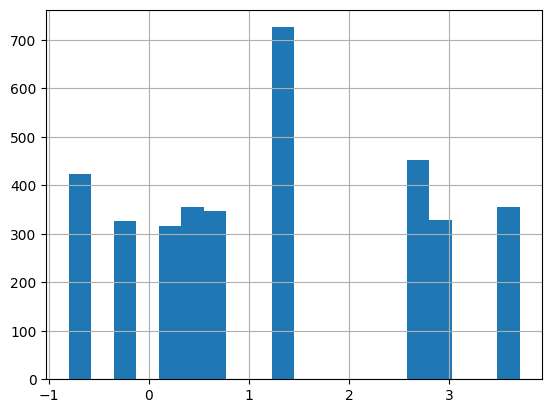

GDP


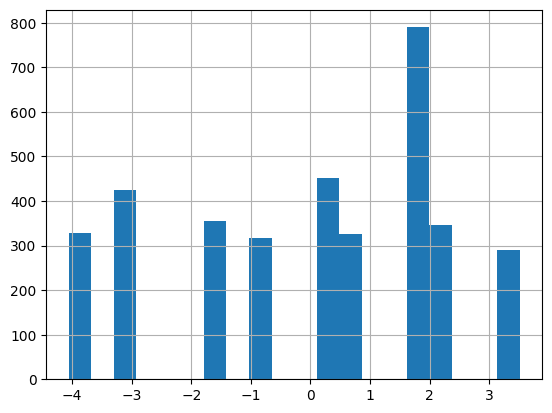

Target


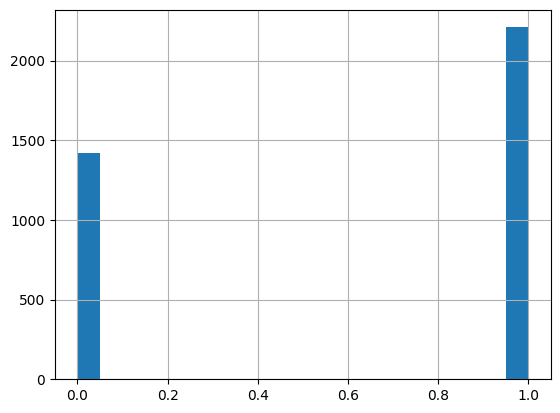

In [ ]:
for column in df.columns:
  print(column)
  df[column].hist(bins=20)
  plt.show()

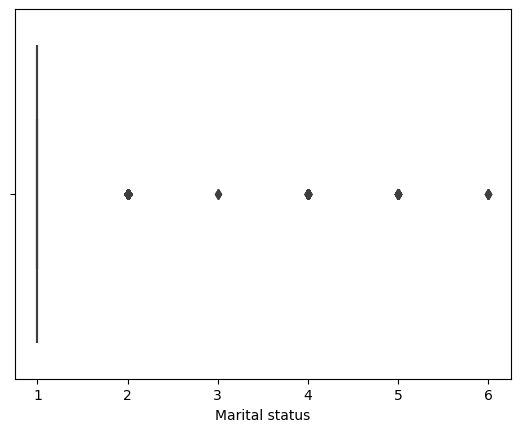

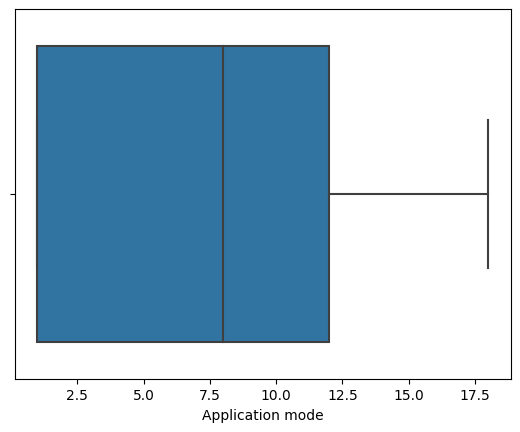

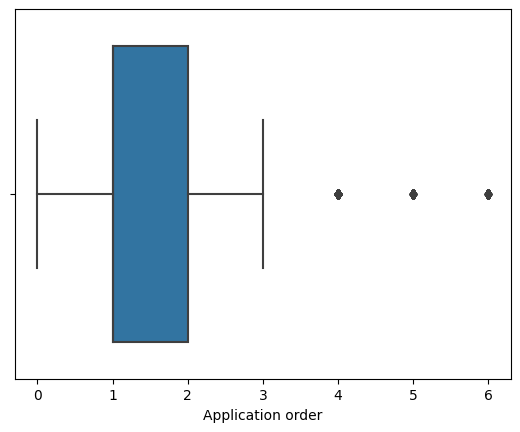

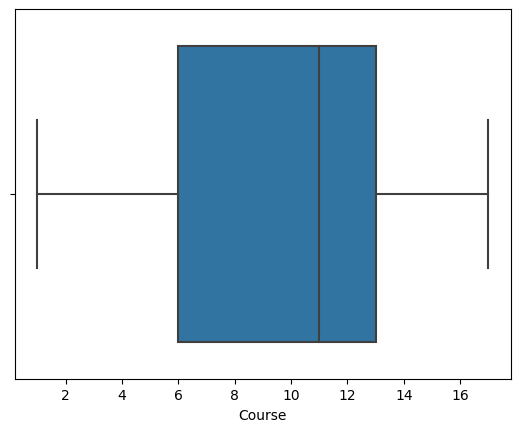

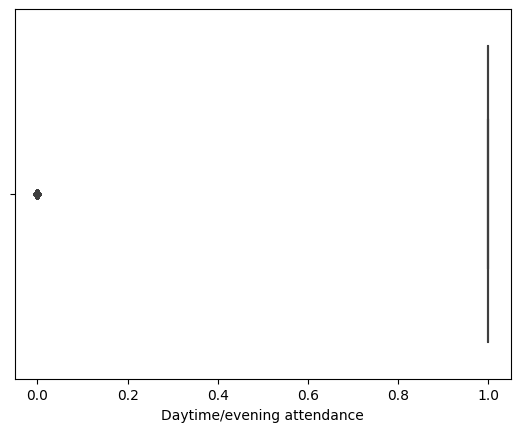

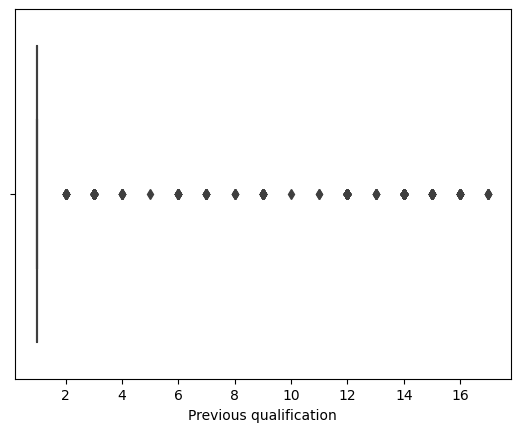

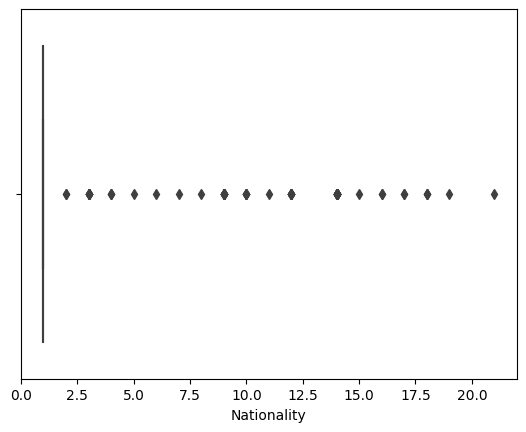

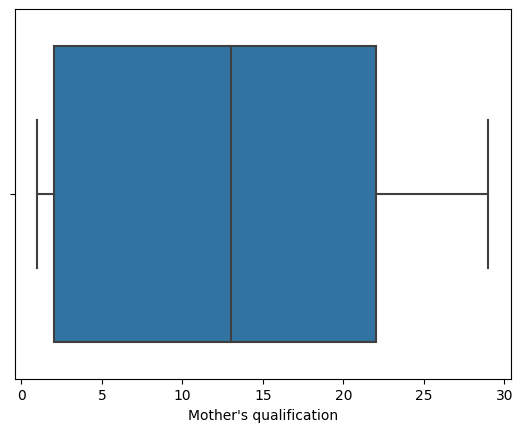

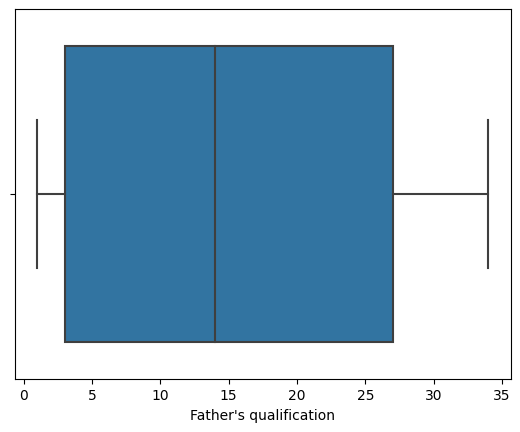

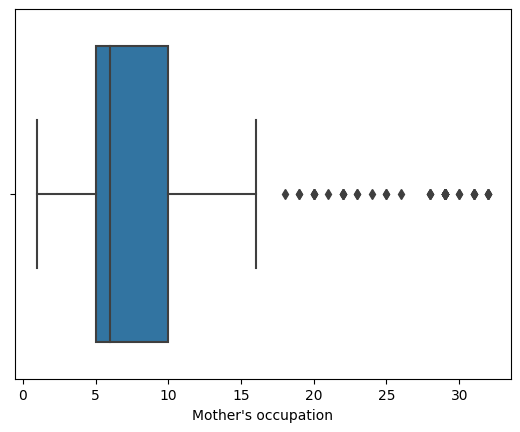

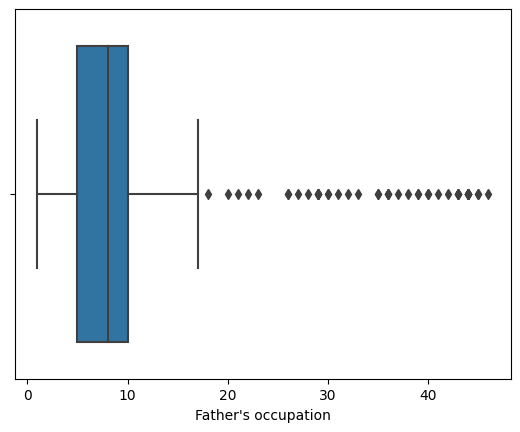

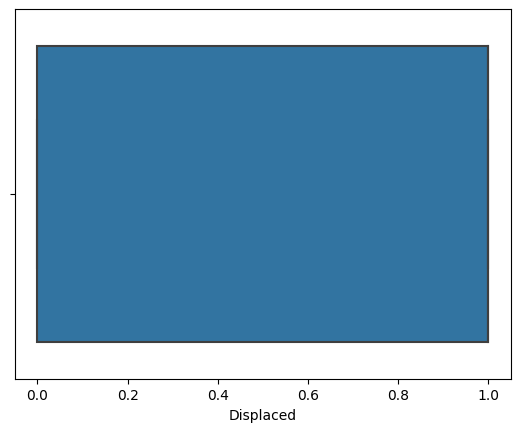

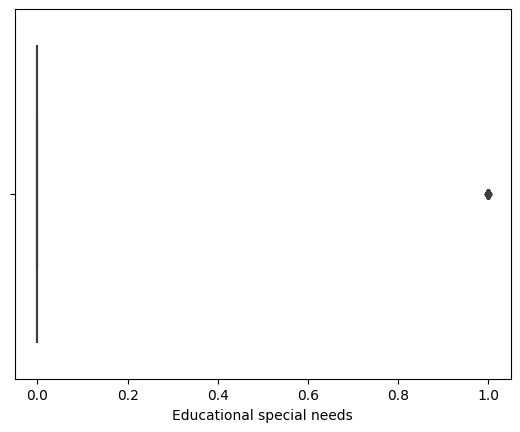

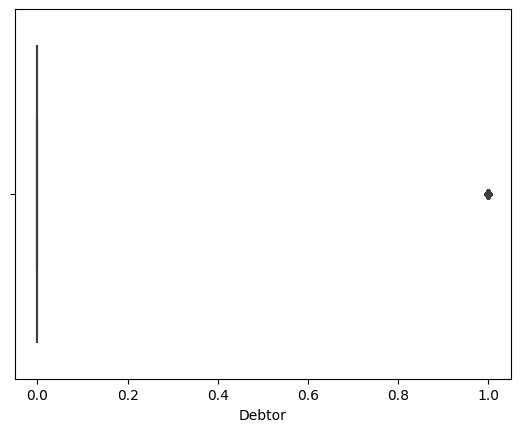

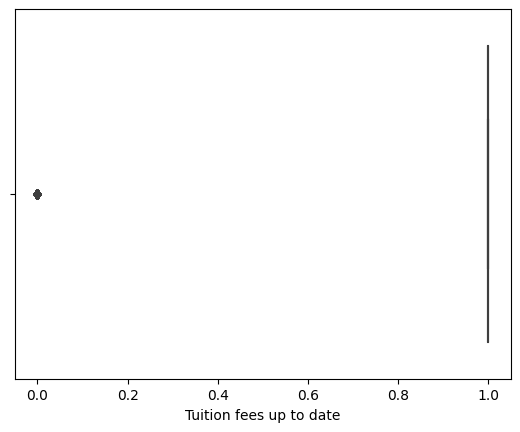

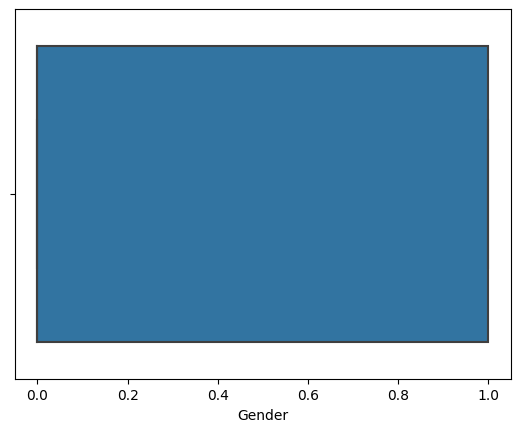

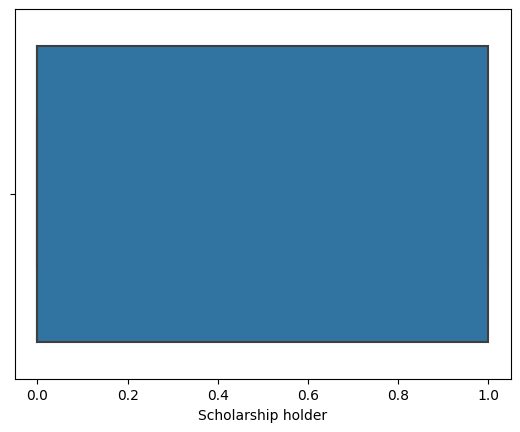

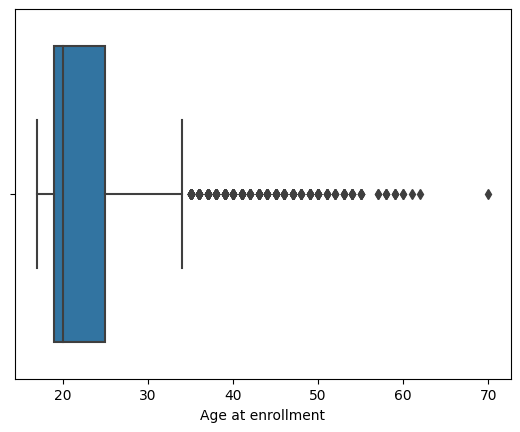

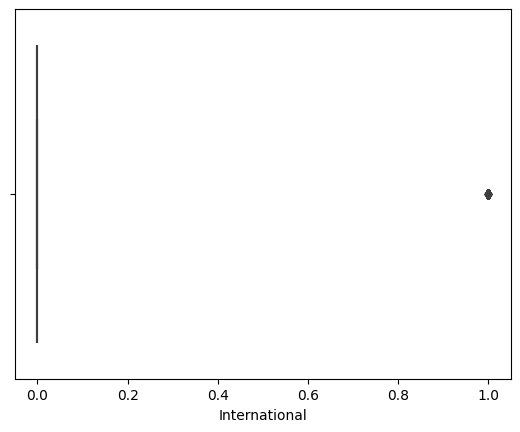

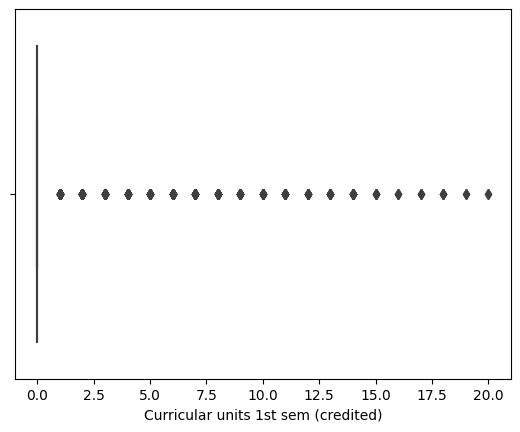

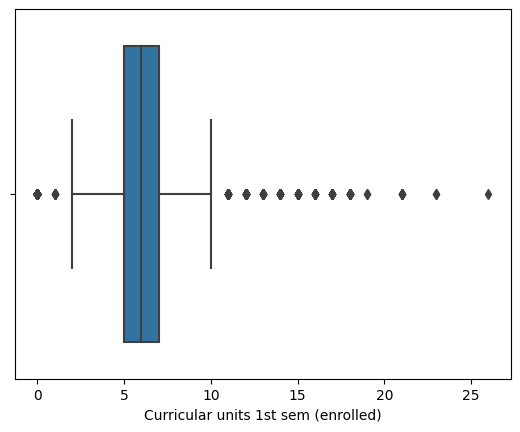

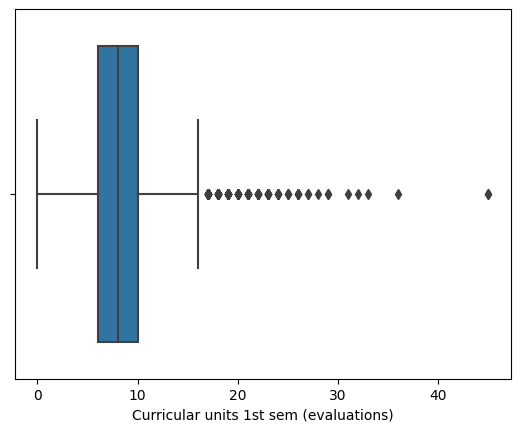

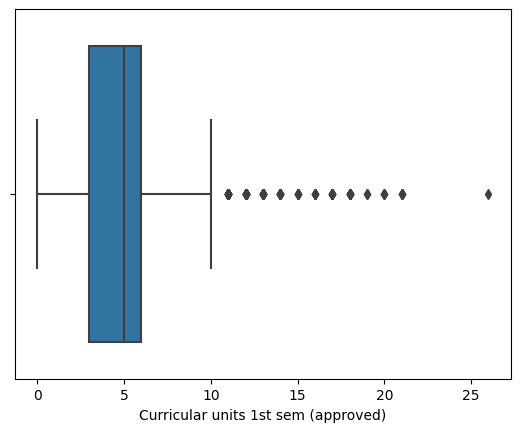

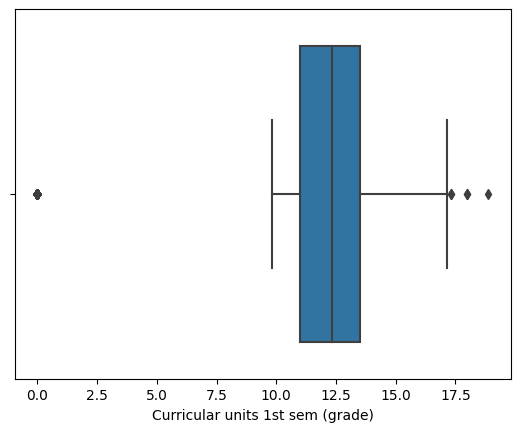

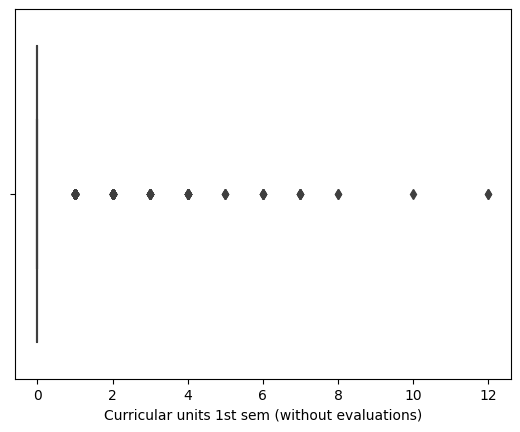

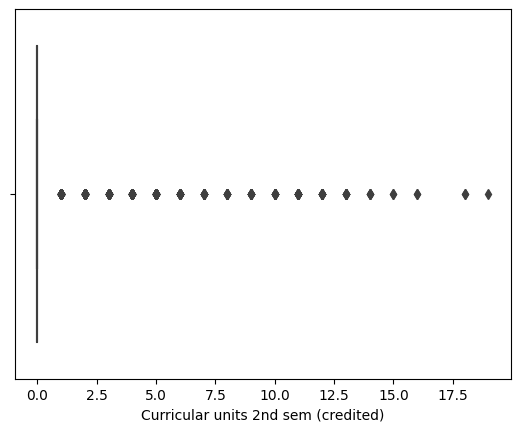

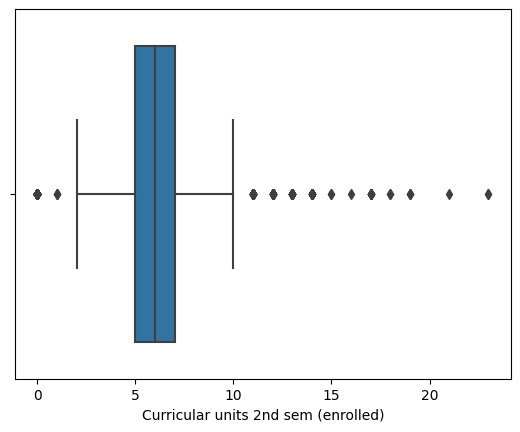

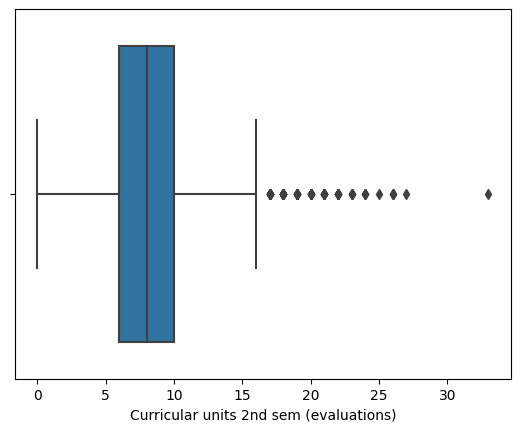

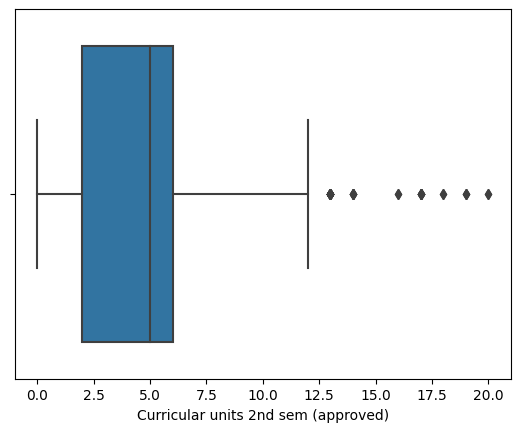

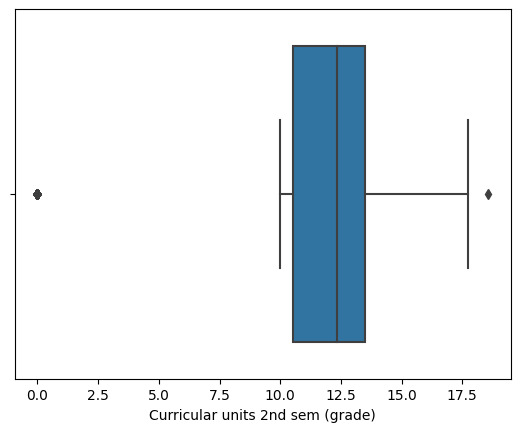

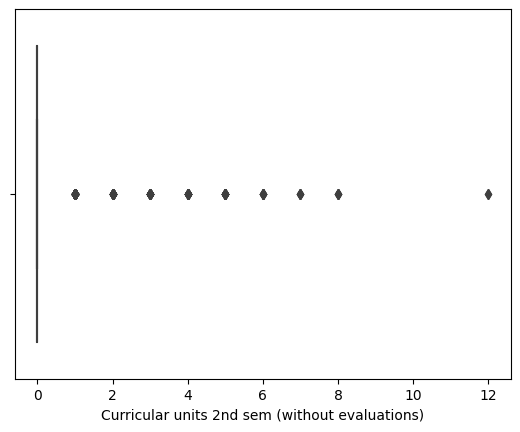

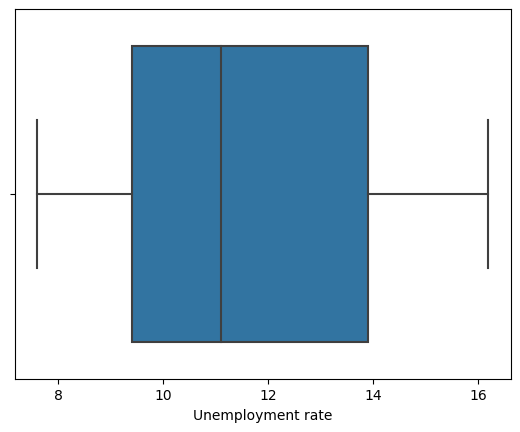

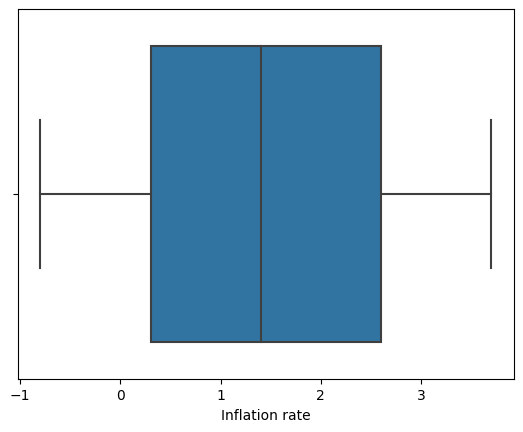

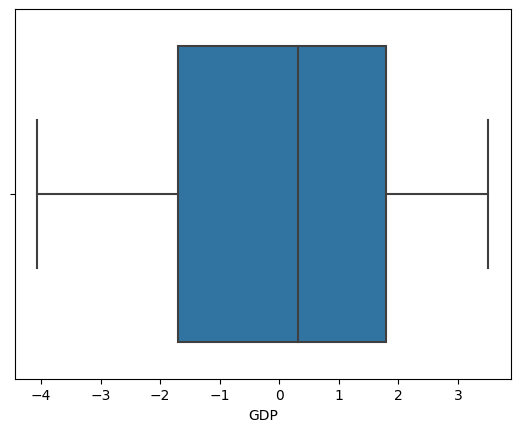

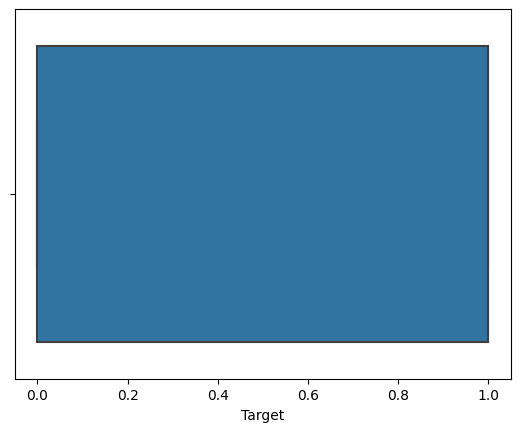

In [ ]:
for column in df.columns:
  sns.boxplot(x=df[column], data = df)
  plt.show()

In [ ]:
# I see a potential outlier in Age:
old_people_indexes = list(df[df['Age at enrollment'] > 60].index)
old_people_indexes

for i in old_people_indexes:
  print(f"Student #{i}")
  print(df.iloc[i])
  print('\n')

Student #565
Marital status                                     4.00
Application mode                                  12.00
Application order                                  2.00
Course                                             9.00
Daytime/evening attendance                         1.00
Previous qualification                            12.00
Nationality                                        1.00
Mother's qualification                            22.00
Father's qualification                            27.00
Mother's occupation                               10.00
Father's occupation                                8.00
Displaced                                          0.00
Educational special needs                          0.00
Debtor                                             1.00
Tuition fees up to date                            0.00
Gender                                             1.00
Scholarship holder                                 0.00
Age at enrollment                  

One of them graduated! Let's fucking gooo<br>
But I will have to remove the 70 year old outlier. At least we know that unfortunately he did not graduate. And we can come back to him later to see how the important factors match up with his data!

Let's get started on the model and fine tune as we go

In [ ]:
X = df.drop(columns = 'Target')
y = df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
# Standardizing the data
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [ ]:
X_train

array([[-0.29922036, -1.10101569, -0.5639619 , ..., -0.30949207,
         0.11903334,  0.77497081],
       [-0.29922036,  0.9928609 , -0.5639619 , ...,  0.29289732,
        -0.52748692,  0.79712735],
       [-0.29922036, -1.10101569,  3.17006766, ...,  0.29289732,
        -0.52748692,  0.79712735],
       ...,
       [-0.29922036, -1.10101569, -0.5639619 , ..., -0.30949207,
         0.11903334,  0.77497081],
       [-0.29922036, -1.10101569,  0.92964992, ..., -0.19654406,
        -0.45565133,  0.89904744],
       [-0.29922036,  0.23145123, -0.5639619 , ..., -0.30949207,
         0.11903334,  0.77497081]])

In [ ]:
logR = LogisticRegression()

In [ ]:
logR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logR.score(X_train, y_train)

0.9152892561983471

In [ ]:
logR.score(X_test, y_test)

0.9077134986225895

So this is our baseline test score with Logistic Regression that we want to improve. And it's already really good, 90.8% accuracy!<br>
Let's have a look at our feature importance:

In [ ]:
coefficients = logR.coef_
coefficients

array([[ 1.45106269e-01, -1.53278434e-01, -2.73978830e-02,
        -3.81813078e-01, -1.74677911e-01,  1.44660719e-01,
        -7.19160261e-01, -1.10494425e-01,  8.51745656e-02,
         1.90766581e-01,  5.09692307e-02, -1.07792789e-01,
        -2.17627381e-02, -3.06281340e-01,  9.45914056e-01,
        -1.79953556e-01,  3.63726114e-01, -2.52952410e-01,
         8.55084147e-01, -4.61271148e-01, -6.63170632e-01,
         6.68093359e-02,  1.89600165e+00, -3.14110285e-01,
         1.63524453e-02, -2.86033895e-01, -1.42619404e+00,
        -2.83445105e-01,  2.98464942e+00,  3.54376026e-01,
         2.82281796e-01, -1.55431293e-01,  4.61265294e-05,
        -6.15547674e-02]])

<Axes: ylabel='Feature'>

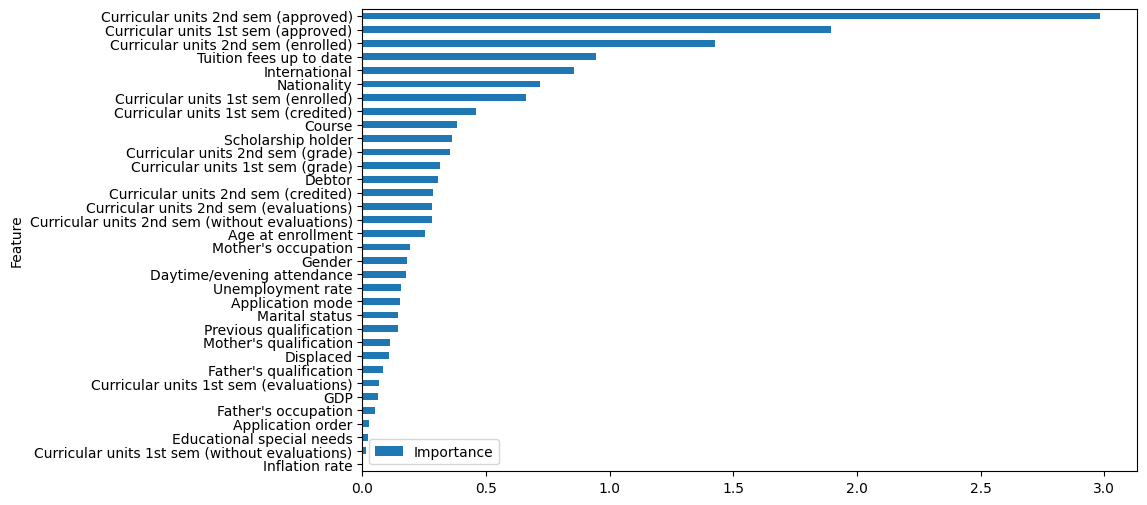

In [ ]:
avg_importance = np.mean(np.abs(logR.coef_), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance',
                                                    ascending= True)
feature_importance.plot(x='Feature', y='Importance',
                        kind='barh', figsize=(10,6))

One very interesting observations here is that one's mother's occupation and qualification are both more important that one's father's occupation and qualification<br>
It is also very reassuring and life-affirming insights to see that educational special needs is not a hindrance for graduation and that gender does not matter





Before removing any features, let's look at a correlation matrix as well

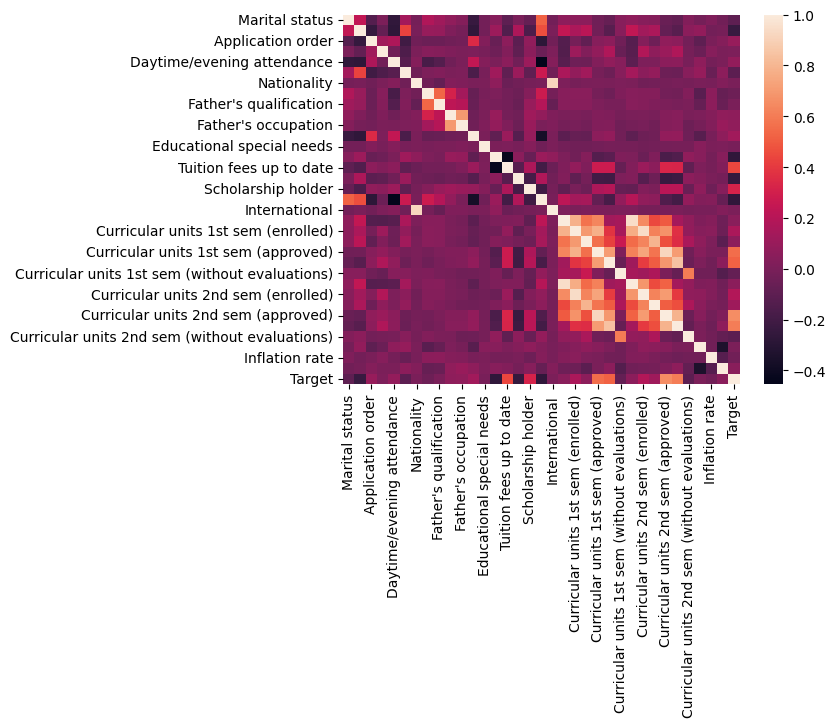

In [ ]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix)
plt.show()

From looking at both of these, we will do the following:
*   Remove ["Inflation rate", "Curricular units 1st sem (without evaluations)", "Educational special needs", "Application order", "Father's occupation", "GDP", "Curricular units 1st sem (evaluations)", "Father's qualification"]. Let's start with that at least
*   We will also remove Nationality since 'Nationality' and 'International Student' are the most correlated columns in the entire dataset and Nationality is the least important once
<br>
Since, we will do this with our two other models to compare Feature Importance, I will save the current df with 3636 rows in a df for future convenience


In [ ]:
df_improved = df.drop(["Inflation rate", "Curricular units 1st sem (without evaluations)",
                       "Educational special needs", "Application order", "Father's occupation",
                       "GDP", "Curricular units 1st sem (evaluations)",
                       "Father's qualification"], axis=1)
df_improved

Marital status  Application mode  Course  Daytime/evening attendance  \
0                  1                 8       2                           1   
1                  1                 6      11                           1   
2                  1                 1       5                           1   
3                  1                 8      15                           1   
4                  2                12       3                           0   
...              ...               ...     ...                         ...   
3625               1                 1      15                           1   
3626               1                 1      15                           1   
3627               1                 1      12                           1   
3628               1                 1       9                           1   
3629               1                 5      15                           1   

      Previous qualification  Nationality  Mother's qualification  \
0                          1            1                      13   
1                          1            1                       1   
2                          1            1                      22   
3                          1            1                      23   
4                          1            1                      22   
...                      ...          ...                     ...   
3625                       1            1                       1   
3626                       1           19                       1   
3627                       1            1                      22   
3628                       1            1                      22   
3629                       1            9                      23   

      Mother's occupation  Displaced  Debtor  ...  \
0                       6          1       0  ...   
1                       4          1       0  ...   
2                      10          1       0  ...   
3                       6          1       0  ...   
4                      10          0       0  ...   
...                   ...        ...     ...  ...   
3625                    6          0       0  ...   
3626                   10          1       1  ...   
3627                   10          1       0  ...   
3628                    8          1       0  ...   
3629                    6          1       0  ...   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                       0                          0.000000   
1                                       6                         14.000000   
2                                       0                          0.000000   
3                                       6                         13.428571   
4                                       5                         12.333333   
...                                   ...                               ...   
3625                                    5                         13.600000   
3626                                    6                         12.000000   
3627                                    7                         14.912500   
3628                                    5                         13.800000   
3629                                    6                         11.666667   

      Curricular units 2nd sem (credited)  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
3625                                    0   
3626                                    0   
3627                                    0   
3628                                    0   
3629                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                      

Let's see if this alone is enough to improve our test score

In [ ]:
X = df_improved.drop(columns = 'Target')
y = df_improved['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)
logR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logR.score(X_train, y_train)

0.9163223140495868

In [ ]:
logR.score(X_test, y_test)

0.9090909090909091

This did indeed increase both our train and test score! Let's try and remove a few more. ["Displaced", "Mother's qualification", "Previous qualification", "Marital status", "Application mode", "Unemployment rate", "Daytime/evening attendance", "Gender", "Mother's occupation"]

In [ ]:
#I ended up not doing this since it lowered the score
df_improved = df_improved.drop(["Displaced", "Mother's qualification",
                       "Previous qualification", "Marital status",
                       "Application mode", "Unemployment rate", ], axis=1)
df_improved

Course  Daytime/evening attendance  Nationality  Mother's occupation  \
0          2                           1            1                    6   
1         11                           1            1                    4   
2          5                           1            1                   10   
3         15                           1            1                    6   
4          3                           0            1                   10   
...      ...                         ...          ...                  ...   
3625      15                           1            1                    6   
3626      15                           1           19                   10   
3627      12                           1            1                   10   
3628       9                           1            1                    8   
3629      15                           1            9                    6   

      Debtor  Tuition fees up to date  Gender  Scholarship holder  \
0          0                        1       1                   0   
1          0                        0       1                   0   
2          0                        0       1                   0   
3          0                        1       0                   0   
4          0                        1       0                   0   
...      ...                      ...     ...                 ...   
3625       0                        1       1                   0   
3626       1                        0       0                   0   
3627       0                        1       0                   1   
3628       0                        1       0                   1   
3629       0                        1       0                   0   

      Age at enrollment  International  ...  \
0                    20              0  ...   
1                    19              0  ...   
2                    19              0  ...   
3                    20              0  ...   
4                    45              0  ...   
...                 ...            ...  ...   
3625                 19              0  ...   
3626                 18              1  ...   
3627                 30              0  ...   
3628                 20              0  ...   
3629                 22              1  ...   

      Curricular units 1st sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
3625                                    6   
3626                                    6   
3627                                    7   
3628                                    5   
3629                                    6   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                       0                          0.000000   
1                                       6                         14.000000   
2                                       0                          0.000000   
3                                       6                         13.428571   
4                                       5                         12.333333   
...                                   ...                               ...   
3625                                    5                         13.600000   
3626                                    6                         12.000000   
3627                                    7                         14.912500   
3628                                    5                         13.800000   
3629                                    6                         11.666667   

      Curricular units 2nd sem (credited)  \
0                                       0   
1                                       0   
2                                       0   
3    

In [ ]:
X = df_improved.drop(columns = 'Target')
y = df_improved['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)
logR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logR.score(X_train, y_train)

0.918732782369146

In [ ]:
logR.score(X_test, y_test)

0.90633608815427

This did increase our train score by ca 0.02 but lowered our test score by 0.03. There is most likely a sweet spot when it comes to dropping features but for now we will go back to the first df_improved (and once again simply name it df for convenience) an continue on to PCA and see how that changes the scores

In [ ]:
df = df_before_feature_engineering
df = df.drop(["Inflation rate", "Curricular units 1st sem (without evaluations)",
                       "Educational special needs", "Application order", "Father's occupation",
                       "GDP", "Curricular units 1st sem (evaluations)",
                       "Father's qualification"], axis=1)
df

Marital status  Application mode  Course  Daytime/evening attendance  \
0                  1                 8       2                           1   
1                  1                 6      11                           1   
2                  1                 1       5                           1   
3                  1                 8      15                           1   
4                  2                12       3                           0   
...              ...               ...     ...                         ...   
3625               1                 1      15                           1   
3626               1                 1      15                           1   
3627               1                 1      12                           1   
3628               1                 1       9                           1   
3629               1                 5      15                           1   

      Previous qualification  Nationality  Mother's qualification  \
0                          1            1                      13   
1                          1            1                       1   
2                          1            1                      22   
3                          1            1                      23   
4                          1            1                      22   
...                      ...          ...                     ...   
3625                       1            1                       1   
3626                       1           19                       1   
3627                       1            1                      22   
3628                       1            1                      22   
3629                       1            9                      23   

      Mother's occupation  Displaced  Debtor  ...  \
0                       6          1       0  ...   
1                       4          1       0  ...   
2                      10          1       0  ...   
3                       6          1       0  ...   
4                      10          0       0  ...   
...                   ...        ...     ...  ...   
3625                    6          0       0  ...   
3626                   10          1       1  ...   
3627                   10          1       0  ...   
3628                    8          1       0  ...   
3629                    6          1       0  ...   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                       0                          0.000000   
1                                       6                         14.000000   
2                                       0                          0.000000   
3                                       6                         13.428571   
4                                       5                         12.333333   
...                                   ...                               ...   
3625                                    5                         13.600000   
3626                                    6                         12.000000   
3627                                    7                         14.912500   
3628                                    5                         13.800000   
3629                                    6                         11.666667   

      Curricular units 2nd sem (credited)  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
3625                                    0   
3626                                    0   
3627                                    0   
3628                                    0   
3629                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                      

In [ ]:
X = df.drop(columns = 'Target')
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [ ]:
# # PCA (we end up not using this)
# pca = PCA(n_components=2)
# principalComponents_train = pca.fit_transform(X_train)
# principalComponents_test = pca.fit_transform(X_test)

In [ ]:
# logR = LogisticRegression()
# logR.fit(principalComponents_train, y_train)

In [ ]:
# logR.score(principalComponents_train, y_train)

In [ ]:
# logR.score(principalComponents_test, y_test)

Principal Component Analysis brings down our test score by quite a bit, ca 0.1. So we most likely won't use it on any of our three models. Before moving on to threshold tuning, let's do some Hyperparameter tuning. Specifically for Logistic Regression, there aren't too many important or useful parameters

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV
param_dist = {"C": np.arange (0.1, 2.0, 0.1),
              "solver": ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'],
              "max_iter" : sp_randint(50, 150)
              }

In [ ]:
# best_score = 0
# while best_score < 0.911154:
#   logR = LogisticRegression()
#   random_search = RandomizedSearchCV(logR, param_distributions=param_dist,
#       n_iter=10, cv=5)
#   random_search.fit(X_train, y_train)
#   cv_score = random_search.best_score_
#   if cv_score > best_score:
#     best_score = cv_score

In [ ]:
# print("Best set of hyperparameters: ", random_search.best_params_)
# print("Best score: ", best_score)

In [ ]:
# random_search.best_estimator_

In [ ]:
# The following is for a RandomizedSearchCV configuration that gives a
# best score of 0.911154 (a good limit where the search started taking
# around 20 seconds)
best_params = {'C': 0.5, 'max_iter': 97, 'solver': 'sag'}

In [ ]:
logR = LogisticRegression(C=0.5, max_iter=97, solver='sag')
logR.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=97, solver='sag')

In [ ]:
logR.score(X_train, y_train)

0.9176997245179064

In [ ]:
logR.score(X_test, y_test)

0.9118457300275482

In this case, we are better off not doing any hyperparameter tuning! Let's bring back our very first model and look at Confusion matrices in terms of Threshold tuning:

In [ ]:
df = df_before_feature_engineering
df_improved = df.drop(["Inflation rate", "Curricular units 1st sem (without evaluations)",
                       "Educational special needs", "Application order", "Father's occupation",
                       "GDP", "Curricular units 1st sem (evaluations)",
                       "Father's qualification"], axis=1)
X = df_improved.drop(columns = 'Target')
y = df_improved['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

logR = LogisticRegression(max_iter= 700)
logR.fit(X_train, y_train)

LogisticRegression(max_iter=700)

In [ ]:
logR.score(X_train, y_train)

0.9163223140495868

In [ ]:
logR.score(X_test, y_test)

0.9090909090909091

In [ ]:
y_pred = logR.predict(X_test)

<Axes: >

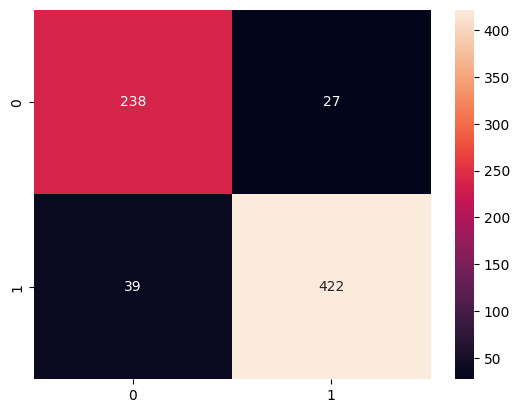

In [ ]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = 'g')

So interpreting this confusion matrix. Out of the 726 predictions (20% of 3630) we have:<br>
*   238 times the model predicted they were going to drop out and they actually did
*   422 times the model predicted they were going to graduate and they actually did
*   27 times the model predicted they were going to drop out but they actually graduated (kudos!!)
*   39 times they model predicted they were going to graduate but they actually dropped out

If we want to improve the model through threshold tweaking, it serves us to think about which Error we want to focus on<br>
The Type I Error (False Positive) in this case is when the model predicts they're going to graduate but they actually drop out<br>
The Type II Error (False Negative) in this case is when the model predicts they're going to drop out but they actually graduate<br>
I would argue that it's better that we focus on having as few Type I errors in this case. We don't want the model to predict someone is going to graduate, setting them up for success, and then they actually drop out. The Type II error in this case is not deadly at all, which in can be in the cast of heart disease etc., but quite the opposite is rather delightful! But in the end, we will let the accuracy speak<br><br>
Let's evaluate with the default threshold of 0.5:

In [ ]:
# # Evaluation metrics for default threshold
# print("Evaluation metrics with threshold 0.5:")
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1 score:", f1_score(y_test, y_pred))

In [ ]:
print("Classification report with default threshold 0.5:",
      metrics.classification_report(y_test, y_pred, digits=4), sep='\n')

Classification report with default threshold 0.5:
              precision    recall  f1-score   support

           0     0.8981    0.8592    0.8782       277
           1     0.9154    0.9399    0.9275       449

    accuracy                         0.9091       726
   macro avg     0.9068    0.8995    0.9029       726
weighted avg     0.9088    0.9091    0.9087       726



**Improving the model by lowering our amount of Type I/Type II errors**

In [ ]:
# y_pred = logR.predict_proba(X_test)
# y_pred = [1 if x[1] > 0.6 else 0 for x in y_pred] #List comprehension
# # We increase the threshold from 0.5 to 0.6 in order to be classified as a 1

In [ ]:
# sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = 'g')

In this updated confusion matrix we see that yes, we have 8 fewer Type I Errors but it came at the expense of 12 *more* Type II Errors. This becomes a question of fine balance. Let's construct a function to find the optimal threshold:



In [ ]:
max_acc = 0
best_threshold = 0
for i in np.arange(0,2,0.05):
  y_pred_temp = logR.predict_proba(X_test)
  y_pred_temp = [1 if x[1] > float("{:.2f}".format(i)) else 0 for x in y_pred_temp]
  acc = accuracy_score(y_pred_temp, y_test)
  if acc > max_acc:
    max_acc = acc
    best_threshold = i
print(f"Maximum accuracy from threshold tweaking: {max_acc} with threshold {float('{:.2f}'.format(best_threshold))}")

Maximum accuracy from threshold tweaking: 0.9146005509641874 with threshold 0.4


We can actually increase our accuracy from 90.90 to 91.46! But we do so with the threshold of 0.4, meaning that we lower the amounts of Type II errors. Let's examine this:

<Axes: >

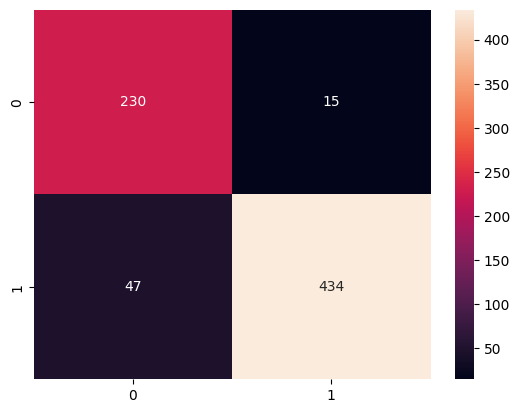

In [ ]:
y_pred_best_threshold = logR.predict_proba(X_test)
y_pred_best_threshold = [1 if x[1] > best_threshold else 0 for x in y_pred_best_threshold]
sns.heatmap(confusion_matrix(y_pred_best_threshold, y_test), annot = True, fmt = 'g')

So we get the best accuracy score with our model when we prioritize lowering the Type II Errors. In the eyes of the model, it's a more efficient sacrifice to let Type I Errors (predict graduate but they drop out) and focus on lowering the delightful Type II Errors (predict drop out but they graduate), which honestly makes sense. Let's evaluate this:

In [ ]:
# # Evaluation metrics for new better threshold
# print("Evaluation metrics with threshold 0.4:")
# print("Accuracy:", accuracy_score(y_test, y_pred_best_threshold))
# print("Precision:", precision_score(y_test, y_pred_best_threshold))
# print("Recall:", recall_score(y_test, y_pred_best_threshold))
# print("F1 score:", f1_score(y_test, y_pred_best_threshold))

In [ ]:
np.random.seed(42)
cv_acc_score_logR = round(np.mean(cross_val_score(logR, X, y, cv=5))*100, 2)
print(f"Classification report for Logistic Regression with the optimal threshold {best_threshold:.2f}:",
      metrics.classification_report(y_test, y_pred_best_threshold, digits=4),
      f"\nCross-validated accuracy of the classifier: {cv_acc_score_logR}%",
      sep='\n')

Classification report for Logistic Regression with the optimal threshold 0.40:
              precision    recall  f1-score   support

           0     0.9388    0.8303    0.8812       277
           1     0.9023    0.9666    0.9333       449

    accuracy                         0.9146       726
   macro avg     0.9205    0.8985    0.9073       726
weighted avg     0.9162    0.9146    0.9135       726


Cross-validated accuracy of the classifier: 91.18%


Compared to our default:

In [ ]:
print("Classification report with default threshold 0.5:",
      metrics.classification_report(y_test, y_pred, digits=4), sep='\n')

Classification report with default threshold 0.5:
              precision    recall  f1-score   support

           0     0.8981    0.8592    0.8782       277
           1     0.9154    0.9399    0.9275       449

    accuracy                         0.9091       726
   macro avg     0.9068    0.8995    0.9029       726
weighted avg     0.9088    0.9091    0.9087       726



It's an improvement in each and every one of them when looking at the weighted avg! Let's plot the ROC Curve:

Area Under the ROC Curve for threshold 0.5: 0.9577400239601842
Area Under the ROC Curve for threshold 0.40: 0.8984586686821096


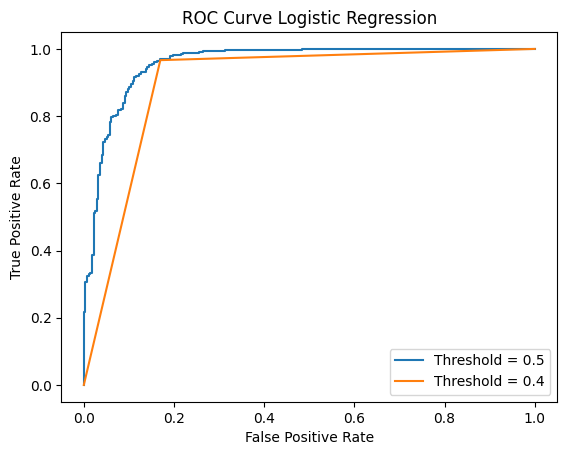

In [ ]:
# ROC Curve
y_scores = logR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')
print('Area Under the ROC Curve for threshold 0.5:',
      roc_auc_score(y_test, y_scores))

# For our newer better threshold
auc_score_logR = roc_auc_score(y_test, y_pred_best_threshold)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_best_threshold)
print(f'Area Under the ROC Curve for threshold {best_threshold:.2f}:',
      auc_score_logR)
plt.plot(fpr_, tpr_, label = f'Threshold = {best_threshold}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend()
plt.show()

The Receiver Operator Characteristic (ROC) curve is simply a curve that displays the ability of binary classifiers by showing the trade-off between sensitivity and specificity; plotting the True Positive Rate against the False Positive Rate. A curve that operates up towards the top left corner is generally better. And when we find the optimal threshold we and see the optimal trade-off in the plot. We want the AUC (Area Under the Curve) value to be as low as possible <br><br>
Let's predict on the subset we left out for testing in the beginning!

In [ ]:
df_final_test = df_test.drop(["Inflation rate", "Curricular units 1st sem (without evaluations)",
                       "Educational special needs", "Application order", "Father's occupation",
                       "GDP", "Curricular units 1st sem (evaluations)",
                       "Father's qualification"], axis=1)
df_final_test

Marital status  Application mode  Course  Daytime/evening attendance  \
0                 1                 9      10                           1   
1                 1                 1      16                           1   
2                 1                 9      13                           1   
3                 1                 1      10                           1   
4                 1                 1       6                           1   
..              ...               ...     ...                         ...   
789               1                 3      16                           1   
790               1                 9      16                           1   
791               1                 1       5                           1   
792               1                14       5                           1   
793               1                14       1                           1   

     Previous qualification  Nationality  Mother's qualification  \
0                         1            1                      13   
1                         1            1                      13   
2                         1            1                       1   
3                         1            1                      13   
4                         1            1                      13   
..                      ...          ...                     ...   
789                       1            1                       3   
790                       1            1                       1   
791                       1            1                       1   
792                       1            1                      13   
793                       1            1                      22   

     Mother's occupation  Displaced  Debtor  ...  \
0                      6          1       0  ...   
1                      8          1       0  ...   
2                      5          1       0  ...   
3                     10          1       1  ...   
4                      4          1       0  ...   
..                   ...        ...     ...  ...   
789                    4          1       0  ...   
790                    4          1       0  ...   
791                    6          1       0  ...   
792                    8          1       0  ...   
793                   10          1       0  ...   

     Curricular units 1st sem (enrolled)  Curricular units 1st sem (approved)  \
0                                      6                                    1   
1                                      7                                    6   
2                                      7                                    7   
3                                      6                                    5   
4                                      5                                    5   
..                                   ...                                  ...   
789                                    6                                    5   
790                                    6                                    5   
791                                    6                                    4   
792                                    6                                    4   
793                                   10                                    5   

     Curricular units 1st sem (grade)  Curricular units 2nd sem (credited)  \
0                           12.000000                                    0   
1                           11.666667                                    0   
2                           11.437500                                    0   
3                           11.600000                                    0   
4                           12.666667                                    0   
..                                ...                                  ...   
789                         12.600000                                    0   
790                         12.600000    

In [ ]:
X_final_test = df_final_test
X_final_test = standard_scaler.fit_transform(X_final_test)
X_final_test.shape

(794, 26)

In [ ]:
predictions = logR.predict(X_final_test)
print(predictions.shape)
predictions = predictions.reshape(-1,1)
print(predictions.shape)
predictions

(794,)
(794, 1)


array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
df_results_all = df_test.copy()
df_results_all['Prediction_Logreg'] = predictions
df_results_all.Prediction_Logreg.replace({0 : 'Dropout', 1 : 'Graduate'}, inplace= True)

df_results_logreg = df_test.copy()
df_results_logreg['Prediction'] = predictions
df_results_logreg.Prediction.replace({0 : 'Dropout', 1 : 'Graduate'}, inplace= True)
df_results_logreg

Marital status  Application mode  Application order  Course  \
0                 1                 9                  1      10   
1                 1                 1                  1      16   
2                 1                 9                  4      13   
3                 1                 1                  1      10   
4                 1                 1                  1       6   
..              ...               ...                ...     ...   
789               1                 3                  4      16   
790               1                 9                  2      16   
791               1                 1                  1       5   
792               1                14                  1       5   
793               1                14                  1       1   

     Daytime/evening attendance  Previous qualification  Nationality  \
0                             1                       1            1   
1                             1                       1            1   
2                             1                       1            1   
3                             1                       1            1   
4                             1                       1            1   
..                          ...                     ...          ...   
789                           1                       1            1   
790                           1                       1            1   
791                           1                       1            1   
792                           1                       1            1   
793                           1                       1            1   

     Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                        13                      28                    6  ...   
1                        13                      14                    8  ...   
2                         1                      28                    5  ...   
3                        13                      28                   10  ...   
4                        13                      14                    4  ...   
..                      ...                     ...                  ...  ...   
789                       3                      28                    4  ...   
790                       1                      14                    4  ...   
791                       1                      28                    6  ...   
792                      13                      14                    8  ...   
793                      22                       1                   10  ...   

     Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                      0                                    6   
1                                      0                                    7   
2                                      0                                    8   
3                                      0                                    6   
4                                      0                                    5   
..                                   ...                                  ...   
789                                    0                                    6   
790                                    0                                    6   
791                                    0                                    6   
792                                    2                                    6   
793                                    2                                    8   

     Curricular units 2nd sem (evaluations)  \
0                                        14   
1                                         8   
2                                         9   
3                                        12   
4                                         7   
..                                      ...   
789                                       9   
7

In [ ]:
df_results_logreg.Prediction.value_counts()

Graduate    442
Dropout     352
Name: Prediction, dtype: int64

With Logistic Regression out of the way and a good understanding of the dataset and the process, let's now build a Random Forest model and a XGBoost model and compare accuracy between them!

# **Building a Random Forest classifier**

In [ ]:
df = df_before_feature_engineering
X = df.drop(columns = ['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

In [ ]:
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.8870523415977961

A typical case of overfitting haha. Let's check feature importance

In [ ]:
clf.feature_importances_

array([0.00245612, 0.01837331, 0.01151925, 0.0251029 , 0.00214215,
       0.00465376, 0.00218292, 0.01547904, 0.01695962, 0.01973814,
       0.02033854, 0.00630875, 0.00088729, 0.01202464, 0.05568727,
       0.00916609, 0.01998132, 0.03383645, 0.00139054, 0.00670825,
       0.02148268, 0.02651024, 0.12213938, 0.07730374, 0.00377576,
       0.00580183, 0.02293435, 0.03517951, 0.21390487, 0.13637684,
       0.00281295, 0.01581233, 0.0147918 , 0.01623739])

<Axes: ylabel='Feature'>

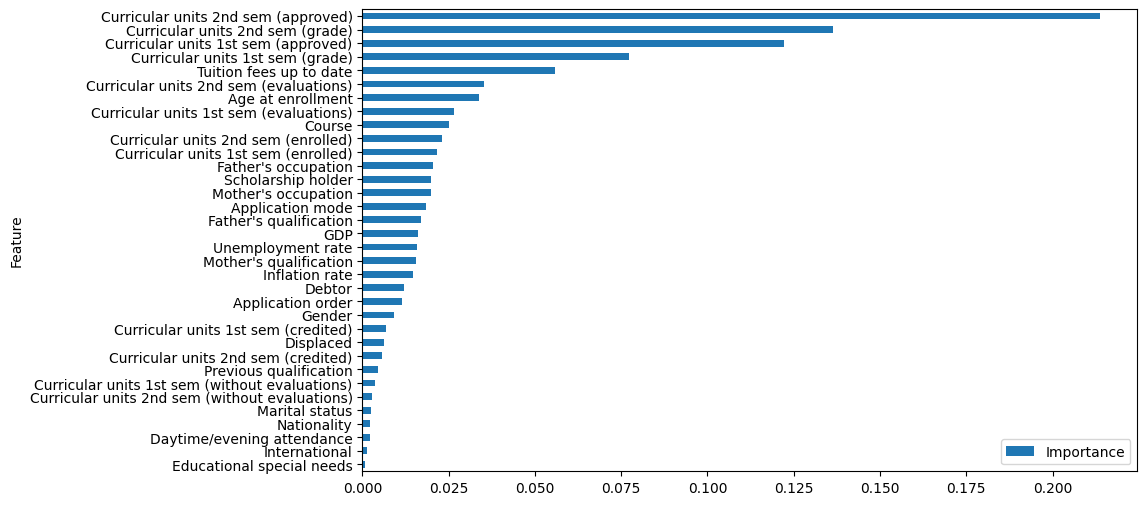

In [ ]:
# avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance',
                                                    ascending= True)
feature_importance.plot(x='Feature', y='Importance',
                        kind='barh', figsize=(10,6))

It's a bit different from the feature importance for our Logistic Regression model but the most important features are essentially all the same. 'Curricular units 2nd sem (approved) is unanimously the most important feature, but what the Random Forest classifier ranks as the 2nd most important, our Logistic Regression classifier ranks as the 11th. Further more, Logistic Regression classifier ranks International as the 5th most important (which is rather odd) while this Random Forest classifier ranks it as the second to least important! Very interesting<br><br>
We will remove the following columns: ['Educational sepcial needs', 'International', 'Daytime/evening attendance', 'Nationality', 'Marital status', 'Curricular units 2nd sem (without evaluations)', 'Curricular units 1st sem (without evaluations)', 'Previous qualification', 'Curricular units 2nd sem (credited)', 'Displaced', 'Curricular units 1st sem (credited)', 'Gender']

In [ ]:
df_improved = df.drop( ['Educational special needs', 'International', 'Daytime/evening attendance',
                        'Nationality', 'Marital status', 'Curricular units 2nd sem (without evaluations)',
                        'Curricular units 1st sem (without evaluations)', 'Previous qualification',
                        'Curricular units 2nd sem (credited)', 'Displaced',
                        'Curricular units 1st sem (credited)', 'Gender'], axis=1)

In [ ]:
X = df_improved.drop(columns = ['Target'])
y = df_improved['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf = clf.fit(X_train, y_train)

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.8884297520661157

Slight improvement in test score! But we still need to do something about the very apparent overfitting. Let's do some hyperparameter tuning, and then do threshold tuning

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV
param_dist = {"max_depth": [2, 3, 5, 7],
              "max_features": [None, 'sqrt', 0.2],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf" : sp_randint(1, 10),
              "n_estimators" : sp_randint(50, 150),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [ ]:
# best_score = 0
# while best_score < 0.9025:
#   clf = RandomForestClassifier()
#   random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
#       n_iter=10, cv=5)
#   random_search.fit(X_train, y_train)
#   cv_score = random_search.best_score_
#   if cv_score > best_score:
#     best_score = cv_score

In [ ]:
# print("Best set of hyperparameters: ", random_search.best_params_)
# print("Best score: ", best_score)

In [ ]:
# random_search.best_estimator_

In [ ]:
# Results from a Randomized SearchCV that gives a best score of 0.903
best_params = {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7,
               'max_features': 'sqrt', 'min_samples_leaf': 6,
               'min_samples_split': 6, 'n_estimators': 119}

In [ ]:
clf = RandomForestClassifier(bootstrap=True, max_depth=7, min_samples_leaf=6,
                             min_samples_split=6, n_estimators=119,
                             criterion= 'entropy', max_features= 'sqrt',
                             random_state=42)

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
clf.score(X_train, y_train)

0.921831955922865

In [ ]:
clf.score(X_test, y_test)

0.90633608815427

We are not overfitting anymore *and* we improved our test score by ca 0.07! Let's finally look at confusion matrixes and tweak our threshold value, following the same process we did with Logistic Regression:

In [ ]:
y_pred = clf.predict(X_test)

<Axes: >

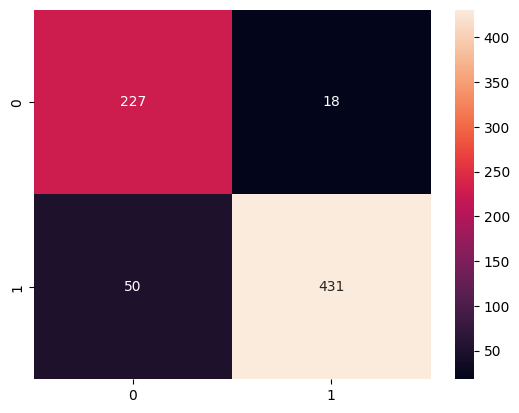

In [ ]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = 'g')

In [ ]:
# # Evaluation metrics for default threshold
# print("Evaluation metrics with threshold 0.5:")
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1 score:", f1_score(y_test, y_pred))

In [ ]:
print("Classification report with default threshold 0.5:",
      metrics.classification_report(y_test, y_pred, digits=4), sep='\n')

Classification report with default threshold 0.5:
              precision    recall  f1-score   support

           0     0.9265    0.8195    0.8697       277
           1     0.8960    0.9599    0.9269       449

    accuracy                         0.9063       726
   macro avg     0.9113    0.8897    0.8983       726
weighted avg     0.9077    0.9063    0.9051       726



In [ ]:
max_acc = 0
best_threshold = 0
for i in np.arange(0,2,0.05):
  y_pred_temp = clf.predict_proba(X_test)
  y_pred_temp = [1 if x[1] > float("{:.2f}".format(i)) else 0 for x in y_pred_temp]
  acc = accuracy_score(y_pred_temp, y_test)
  if acc > max_acc:
    max_acc = acc
    best_threshold = i
print(f"Maximum accuracy from threshold tweaking: {max_acc} with threshold {float('{:.2f}'.format(best_threshold))}")

Maximum accuracy from threshold tweaking: 0.90633608815427 with threshold 0.5


An improvement of ca 0.07 just from threshold tuning!

<Axes: >

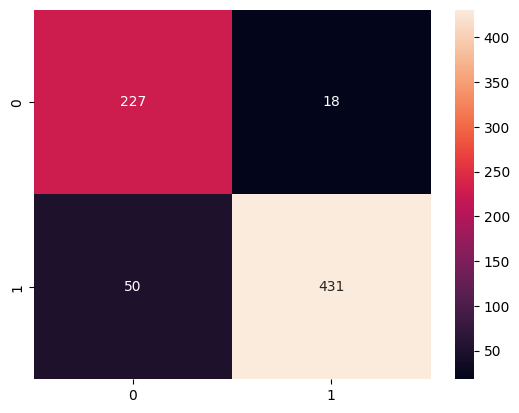

In [ ]:
y_pred_best_threshold = clf.predict_proba(X_test)
y_pred_best_threshold = [1 if x[1] > best_threshold else 0 for x in y_pred_best_threshold]
sns.heatmap(confusion_matrix(y_pred_best_threshold, y_test), annot = True, fmt = 'g')

In [ ]:
# # Evaluation metrics for best threshold
# print(f"Evaluation metrics with threshold {best_threshold}:")
# print("Accuracy:", accuracy_score(y_test, y_pred_best_threshold))
# print("Precision:", precision_score(y_test, y_pred_best_threshold))
# print("Recall:", recall_score(y_test, y_pred_best_threshold))
# print("F1 score:", f1_score(y_test, y_pred_best_threshold))

In [ ]:
np.random.seed(42)
cv_acc_score_randf = round(np.mean(cross_val_score(clf, X, y, cv=5))*100, 2)
print(f"Classification report for Random Forest with the optimal threshold {best_threshold:.2f}:",
      metrics.classification_report(y_test, y_pred_best_threshold, digits=4),
      f"\nCross-validated accuracy of the classifier: {cv_acc_score_randf}%",
      sep='\n')

Classification report for Random Forest with the optimal threshold 0.50:
              precision    recall  f1-score   support

           0     0.9265    0.8195    0.8697       277
           1     0.8960    0.9599    0.9269       449

    accuracy                         0.9063       726
   macro avg     0.9113    0.8897    0.8983       726
weighted avg     0.9077    0.9063    0.9051       726


Cross-validated accuracy of the classifier: 90.33%


In [ ]:
print("Classification report with default threshold 0.5:",
      metrics.classification_report(y_test, y_pred, digits=4), sep='\n')

Classification report with default threshold 0.5:
              precision    recall  f1-score   support

           0     0.9265    0.8195    0.8697       277
           1     0.8960    0.9599    0.9269       449

    accuracy                         0.9063       726
   macro avg     0.9113    0.8897    0.8983       726
weighted avg     0.9077    0.9063    0.9051       726



Area Under the ROC Curve for threshold 0.5: 0.9472875945743852
Area Under the ROC Curve for threshold 0.50: 0.8897027489889284


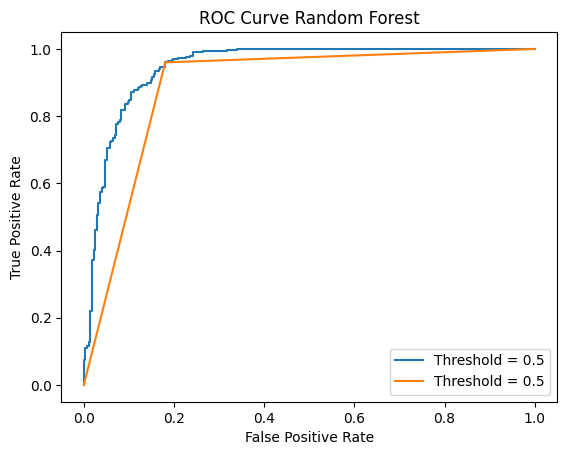

In [ ]:
# ROC Curve
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')
print('Area Under the ROC Curve for threshold 0.5:',
      roc_auc_score(y_test, y_scores))

# For our newer better threshold
auc_score_randf = roc_auc_score(y_test, y_pred_best_threshold)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_best_threshold)
print(f'Area Under the ROC Curve for threshold {best_threshold:.2f}:',
      auc_score_randf)
plt.plot(fpr_, tpr_, label = f'Threshold = {best_threshold}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.legend()
plt.show()

Predicting on the test dataset with this optimal threshold value:

In [ ]:
X_final_test = df_test.drop( ['Educational special needs', 'International', 'Daytime/evening attendance',
                        'Nationality', 'Marital status', 'Curricular units 2nd sem (without evaluations)',
                        'Curricular units 1st sem (without evaluations)', 'Previous qualification',
                        'Curricular units 2nd sem (credited)', 'Displaced',
                        'Curricular units 1st sem (credited)', 'Gender'], axis=1)
X_final_test = standard_scaler.fit_transform(X_final_test)
X_final_test.shape

predictions = clf.predict(X_final_test)
predictions = predictions.reshape(-1,1)
predictions

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [ ]:
df_results_all['Prediction_Randforest'] = predictions
df_results_all.Prediction_Randforest.replace({0 : 'Dropout', 1 : 'Graduate'}, inplace= True)

df_results_randforest = df_test.copy()
df_results_randforest['Prediction'] = predictions
df_results_randforest.Prediction.replace({0 : 'Dropout', 1 : 'Graduate'}, inplace= True)
df_results_randforest

Marital status  Application mode  Application order  Course  \
0                 1                 9                  1      10   
1                 1                 1                  1      16   
2                 1                 9                  4      13   
3                 1                 1                  1      10   
4                 1                 1                  1       6   
..              ...               ...                ...     ...   
789               1                 3                  4      16   
790               1                 9                  2      16   
791               1                 1                  1       5   
792               1                14                  1       5   
793               1                14                  1       1   

     Daytime/evening attendance  Previous qualification  Nationality  \
0                             1                       1            1   
1                             1                       1            1   
2                             1                       1            1   
3                             1                       1            1   
4                             1                       1            1   
..                          ...                     ...          ...   
789                           1                       1            1   
790                           1                       1            1   
791                           1                       1            1   
792                           1                       1            1   
793                           1                       1            1   

     Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                        13                      28                    6  ...   
1                        13                      14                    8  ...   
2                         1                      28                    5  ...   
3                        13                      28                   10  ...   
4                        13                      14                    4  ...   
..                      ...                     ...                  ...  ...   
789                       3                      28                    4  ...   
790                       1                      14                    4  ...   
791                       1                      28                    6  ...   
792                      13                      14                    8  ...   
793                      22                       1                   10  ...   

     Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                      0                                    6   
1                                      0                                    7   
2                                      0                                    8   
3                                      0                                    6   
4                                      0                                    5   
..                                   ...                                  ...   
789                                    0                                    6   
790                                    0                                    6   
791                                    0                                    6   
792                                    2                                    6   
793                                    2                                    8   

     Curricular units 2nd sem (evaluations)  \
0                                        14   
1                                         8   
2                                         9   
3                                        12   
4                                         7   
..                                      ...   
789                                       9   
7

In [ ]:
df_results_randforest.Prediction.value_counts()

Graduate    442
Dropout     352
Name: Prediction, dtype: int64

#**Building a Gaussian Naive Bayes classifier**

In [ ]:
df = df_before_feature_engineering
X = df.drop(columns = ['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

In [ ]:
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [ ]:
gaussian = GaussianNB()

In [ ]:
gaussian.fit(X_train, y_train)

GaussianNB()

In [ ]:
gaussian.score(X_train, y_train)

0.84366391184573

In [ ]:
gaussian.score(X_test, y_test)

0.859504132231405

Gaussian NB does not have intrinsic feature importance! And when to comes to hyperparameter tuning... there's really only one parameter to tune! And when could run the following but we have to awit 40+ seconds and wouldn't get anything worthwhile anyway

In [ ]:
# # Hyperparameter tuning using RandomizedSearchCV
# param_dist = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# best_score = 0
# while best_score < 0.84:
#   gaussian = GaussianNB()
#   random_search = RandomizedSearchCV(gaussian, param_distributions=param_dist,
#       n_iter=10, cv=5)
#   random_search.fit(X_train, y_train)
#   cv_score = random_search.best_score_
#   if cv_score > best_score:
#     best_score = cv_score

<Axes: >

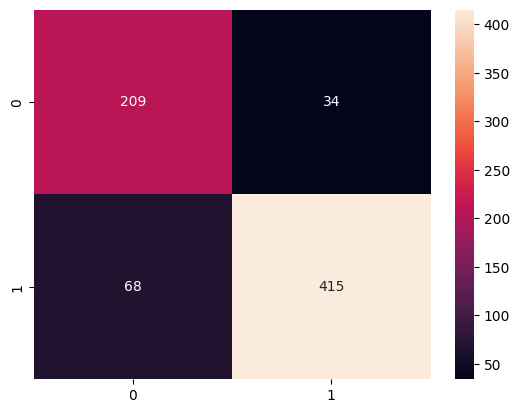

In [ ]:
y_pred = gaussian.predict(X_test)
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = 'g')

In [ ]:
print("Classification report with default threshold 0.5:",
      metrics.classification_report(y_test, y_pred, digits=4), sep='\n')

Classification report with default threshold 0.5:
              precision    recall  f1-score   support

           0     0.8601    0.7545    0.8038       277
           1     0.8592    0.9243    0.8906       449

    accuracy                         0.8595       726
   macro avg     0.8596    0.8394    0.8472       726
weighted avg     0.8595    0.8595    0.8575       726



In [ ]:
max_acc = 0
best_threshold = 0
for i in np.arange(0,2,0.05):
  y_pred_temp = gaussian.predict_proba(X_test)
  y_pred_temp = [1 if x[1] > float("{:.2f}".format(i)) else 0 for x in y_pred_temp]
  acc = accuracy_score(y_pred_temp, y_test)
  if acc > max_acc:
    max_acc = acc
    best_threshold = i
print(f"Maximum accuracy from threshold tweaking: {max_acc} with threshold {float('{:.2f}'.format(best_threshold))}")

Maximum accuracy from threshold tweaking: 0.8608815426997245 with threshold 0.45


<Axes: >

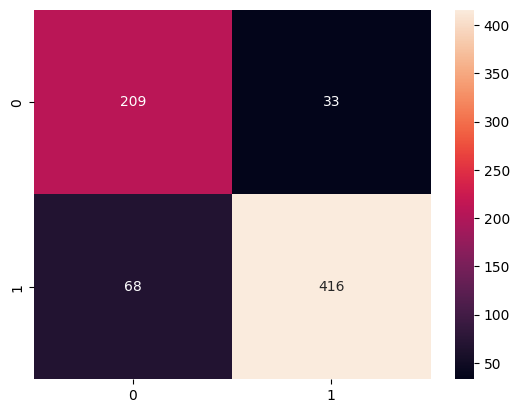

In [ ]:
y_pred_best_threshold = gaussian.predict_proba(X_test)
y_pred_best_threshold = [1 if x[1] > best_threshold else 0 for x in y_pred_best_threshold]
sns.heatmap(confusion_matrix(y_pred_best_threshold, y_test), annot = True, fmt = 'g')

In [ ]:
np.random.seed(42)
cv_acc_score_gaussian = round(np.mean(cross_val_score(gaussian, X, y, cv=5))*100, 2)
print(f"Classification report for Gaussian NB with the optimal threshold {best_threshold:.2f}:",
      metrics.classification_report(y_test, y_pred_best_threshold, digits=4),
      f"\nCross-validated accuracy of the classifier: {cv_acc_score_gaussian}%",
      sep='\n')

Classification report for Gaussian NB with the optimal threshold 0.45:
              precision    recall  f1-score   support

           0     0.8636    0.7545    0.8054       277
           1     0.8595    0.9265    0.8917       449

    accuracy                         0.8609       726
   macro avg     0.8616    0.8405    0.8486       726
weighted avg     0.8611    0.8609    0.8588       726


Cross-validated accuracy of the classifier: 84.46%


Area Under the ROC Curve for threshold 0.5: 0.8874514565058332
Area Under the ROC Curve for threshold 0.45: 0.8405079880681499


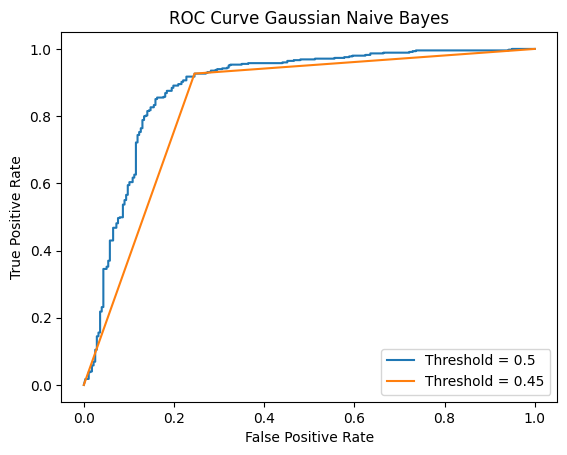

In [ ]:
# ROC Curve
y_scores = gaussian.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')
print('Area Under the ROC Curve for threshold 0.5:',
      roc_auc_score(y_test, y_scores))

# For our newer better threshold
auc_score_gaussian = roc_auc_score(y_test, y_pred_best_threshold)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_best_threshold)
print(f'Area Under the ROC Curve for threshold {best_threshold:.2f}:',
      auc_score_gaussian)
plt.plot(fpr_, tpr_, label = f'Threshold = {best_threshold}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Gaussian Naive Bayes')
plt.legend()
plt.show()

In [ ]:
X_final_test = df_test.copy() # We didn't drop any features for NB
X_final_test = standard_scaler.fit_transform(X_final_test)
X_final_test.shape

predictions = gaussian.predict(X_final_test)
predictions = predictions.reshape(-1,1)

In [ ]:
df_results_all['Prediction_GaussianNB'] = predictions
df_results_all.Prediction_GaussianNB.replace({0 : 'Dropout', 1 : 'Graduate'}, inplace= True)

df_results_gaussnb = df_test.copy()
df_results_gaussnb['Prediction'] = predictions
df_results_gaussnb.Prediction.replace({0 : 'Dropout', 1 : 'Graduate'}, inplace= True)
df_results_gaussnb

Marital status  Application mode  Application order  Course  \
0                 1                 9                  1      10   
1                 1                 1                  1      16   
2                 1                 9                  4      13   
3                 1                 1                  1      10   
4                 1                 1                  1       6   
..              ...               ...                ...     ...   
789               1                 3                  4      16   
790               1                 9                  2      16   
791               1                 1                  1       5   
792               1                14                  1       5   
793               1                14                  1       1   

     Daytime/evening attendance  Previous qualification  Nationality  \
0                             1                       1            1   
1                             1                       1            1   
2                             1                       1            1   
3                             1                       1            1   
4                             1                       1            1   
..                          ...                     ...          ...   
789                           1                       1            1   
790                           1                       1            1   
791                           1                       1            1   
792                           1                       1            1   
793                           1                       1            1   

     Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                        13                      28                    6  ...   
1                        13                      14                    8  ...   
2                         1                      28                    5  ...   
3                        13                      28                   10  ...   
4                        13                      14                    4  ...   
..                      ...                     ...                  ...  ...   
789                       3                      28                    4  ...   
790                       1                      14                    4  ...   
791                       1                      28                    6  ...   
792                      13                      14                    8  ...   
793                      22                       1                   10  ...   

     Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                      0                                    6   
1                                      0                                    7   
2                                      0                                    8   
3                                      0                                    6   
4                                      0                                    5   
..                                   ...                                  ...   
789                                    0                                    6   
790                                    0                                    6   
791                                    0                                    6   
792                                    2                                    6   
793                                    2                                    8   

     Curricular units 2nd sem (evaluations)  \
0                                        14   
1                                         8   
2                                         9   
3                                        12   
4                                         7   
..                                      ...   
789                                       9   
7

In [ ]:
df_results_gaussnb['Prediction'].value_counts()

Graduate    557
Dropout     237
Name: Prediction, dtype: int64

I already have a strong feeling this is gonna be our worst-performing classifier

#**Building a Linear Support Vector Machine classifier**

In [ ]:
df = df_before_feature_engineering
X = df.drop(columns = ['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

In [ ]:
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [ ]:
svc = LinearSVC()

In [ ]:
svc.fit(X_train, y_train)

LinearSVC()

In [ ]:
svc.score(X_train, y_train)

0.9142561983471075

In [ ]:
svc.score(X_test, y_test)

0.9132231404958677

This is a *really* good first score! LinearSVC doesn't really have feature importance in the normal sense either and the attempt at hyperparameter tuning below gives ConvergeWarning. Let's move on to Threshold Selection!

In [ ]:
# # Hyperparameter tuning using RandomizedSearchCV
# param_dist = {'loss': ['hinge', 'squared_hinge'],
#               'dual': [True, False],
#               'fit_intercept': [True, False],
#               'C': np.arange(0.5,3,0.1)
#               }

In [ ]:
# best_score = 0
# while best_score < 0.92:
#   svc=LinearSVC()
#   random_search = RandomizedSearchCV(svc, param_distributions=param_dist,
#       n_iter=10, cv=5)
#   random_search.fit(X_train, y_train)
#   cv_score = random_search.best_score_
#   if cv_score > best_score:
#     best_score = cv_score

<Axes: >

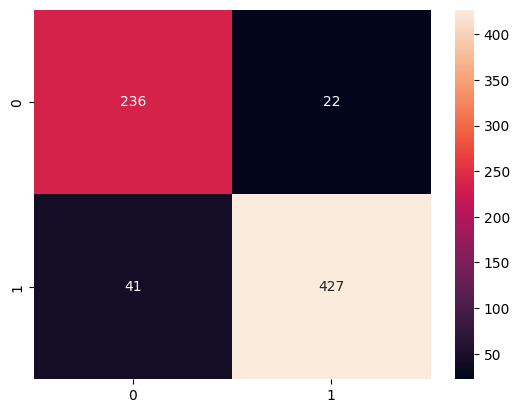

In [ ]:
y_pred = svc.predict(X_test)
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = 'g')

In [ ]:
print("Classification report with default threshold 0.5:",
      metrics.classification_report(y_test, y_pred, digits=4), sep='\n')

Classification report with default threshold 0.5:
              precision    recall  f1-score   support

           0     0.9147    0.8520    0.8822       277
           1     0.9124    0.9510    0.9313       449

    accuracy                         0.9132       726
   macro avg     0.9136    0.9015    0.9068       726
weighted avg     0.9133    0.9132    0.9126       726



In [ ]:
svc = CalibratedClassifierCV(svc)
svc.fit(X_train, y_train)
max_acc = 0
best_threshold = 0
for i in np.arange(0,2,0.05):
  y_pred_temp = svc.predict_proba(X_test)
  y_pred_temp = [1 if x[1] > float("{:.2f}".format(i)) else 0 for x in y_pred_temp]
  acc = accuracy_score(y_pred_temp, y_test)
  if acc > max_acc:
    max_acc = acc
    best_threshold = i
print(f"Maximum accuracy from threshold tweaking: {max_acc} with threshold {float('{:.2f}'.format(best_threshold))}")

Maximum accuracy from threshold tweaking: 0.9146005509641874 with threshold 0.45


<Axes: >

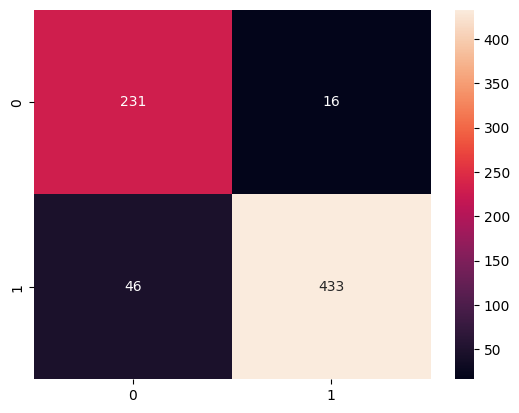

In [ ]:
y_pred_best_threshold = svc.predict_proba(X_test)
y_pred_best_threshold = [1 if x[1] > best_threshold else 0 for x in y_pred_best_threshold]
sns.heatmap(confusion_matrix(y_pred_best_threshold, y_test), annot = True, fmt = 'g')

In [ ]:
np.random.seed(42)
cv_acc_score_svc = round(np.mean(cross_val_score(svc, X, y, cv=5))*100, 2)
print(f"Classification report for Support Vector Classification with the optimal threshold {best_threshold:.2f}:",
      metrics.classification_report(y_test, y_pred_best_threshold, digits=4),
      f"\nCross-validated accuracy of the classifier: {cv_acc_score_svc}%",
      sep='\n')

Classification report for Support Vector Classification with the optimal threshold 0.45:
              precision    recall  f1-score   support

           0     0.9352    0.8339    0.8817       277
           1     0.9040    0.9644    0.9332       449

    accuracy                         0.9146       726
   macro avg     0.9196    0.8992    0.9074       726
weighted avg     0.9159    0.9146    0.9135       726


Cross-validated accuracy of the classifier: 91.21%


Area Under the ROC Curve for threshold 0.5: 0.9580777178326485
Area Under the ROC Curve for threshold 0.45: 0.8991501370876316


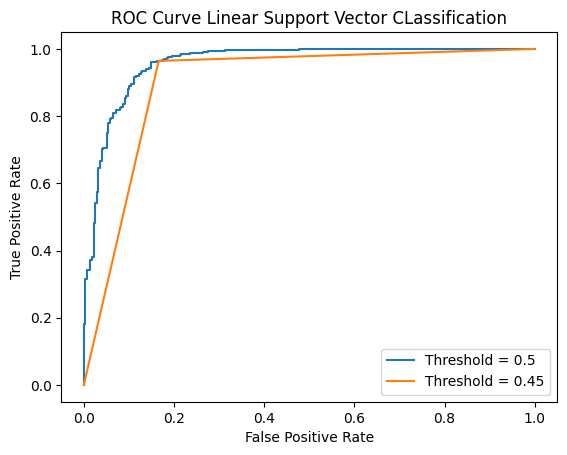

In [ ]:
# ROC Curve
y_scores = svc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')
print('Area Under the ROC Curve for threshold 0.5:',
      roc_auc_score(y_test, y_scores))

# For our newer better threshold
auc_score_svc = roc_auc_score(y_test, y_pred_best_threshold)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_best_threshold)
print(f'Area Under the ROC Curve for threshold {best_threshold:.2f}:',
      auc_score_svc)
plt.plot(fpr_, tpr_, label = f'Threshold = {best_threshold}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Linear Support Vector CLassification')
plt.legend()
plt.show()

In [ ]:
X_final_test = df_test.copy()
X_final_test = standard_scaler.fit_transform(X_final_test)
X_final_test.shape

predictions = svc.predict(X_final_test)
predictions = predictions.reshape(-1,1)

In [ ]:
df_results_all['Prediction_LinearSVC'] = predictions
df_results_all.Prediction_LinearSVC.replace({0 : 'Dropout', 1 : 'Graduate'}, inplace= True)

df_results_linsvc = df_test.copy()
df_results_linsvc['Prediction'] = predictions
df_results_linsvc.Prediction.replace({0 : 'Dropout', 1 : 'Graduate'}, inplace= True)
df_results_linsvc

Marital status  Application mode  Application order  Course  \
0                 1                 9                  1      10   
1                 1                 1                  1      16   
2                 1                 9                  4      13   
3                 1                 1                  1      10   
4                 1                 1                  1       6   
..              ...               ...                ...     ...   
789               1                 3                  4      16   
790               1                 9                  2      16   
791               1                 1                  1       5   
792               1                14                  1       5   
793               1                14                  1       1   

     Daytime/evening attendance  Previous qualification  Nationality  \
0                             1                       1            1   
1                             1                       1            1   
2                             1                       1            1   
3                             1                       1            1   
4                             1                       1            1   
..                          ...                     ...          ...   
789                           1                       1            1   
790                           1                       1            1   
791                           1                       1            1   
792                           1                       1            1   
793                           1                       1            1   

     Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                        13                      28                    6  ...   
1                        13                      14                    8  ...   
2                         1                      28                    5  ...   
3                        13                      28                   10  ...   
4                        13                      14                    4  ...   
..                      ...                     ...                  ...  ...   
789                       3                      28                    4  ...   
790                       1                      14                    4  ...   
791                       1                      28                    6  ...   
792                      13                      14                    8  ...   
793                      22                       1                   10  ...   

     Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                      0                                    6   
1                                      0                                    7   
2                                      0                                    8   
3                                      0                                    6   
4                                      0                                    5   
..                                   ...                                  ...   
789                                    0                                    6   
790                                    0                                    6   
791                                    0                                    6   
792                                    2                                    6   
793                                    2                                    8   

     Curricular units 2nd sem (evaluations)  \
0                                        14   
1                                         8   
2                                         9   
3                                        12   
4                                         7   
..                                      ...   
789                                       9   
7

In [ ]:
df_results_linsvc['Prediction'].value_counts()

Graduate    450
Dropout     344
Name: Prediction, dtype: int64

#**Building a XGBoost classifier**

In [ ]:
df = df_before_feature_engineering
X = df.drop(columns = ['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.8994490358126722

0.9 on the first go is not bad! Let's check feauture importance, then do some hyperparameter tuning and finally threshold tuning

In [ ]:
print(xgb.feature_importances_)

[0.01075862 0.01470979 0.01318229 0.01808623 0.00768047 0.01162171
 0.01269974 0.01201195 0.01174059 0.01157485 0.01006521 0.01205917
 0.         0.01599488 0.13149117 0.01537178 0.02889495 0.01356632
 0.         0.01114993 0.07271904 0.01470175 0.02678714 0.01359524
 0.03045163 0.02912    0.02516513 0.01937964 0.34611565 0.0146611
 0.00796705 0.01213619 0.01300425 0.01153652]


<Axes: ylabel='Feature'>

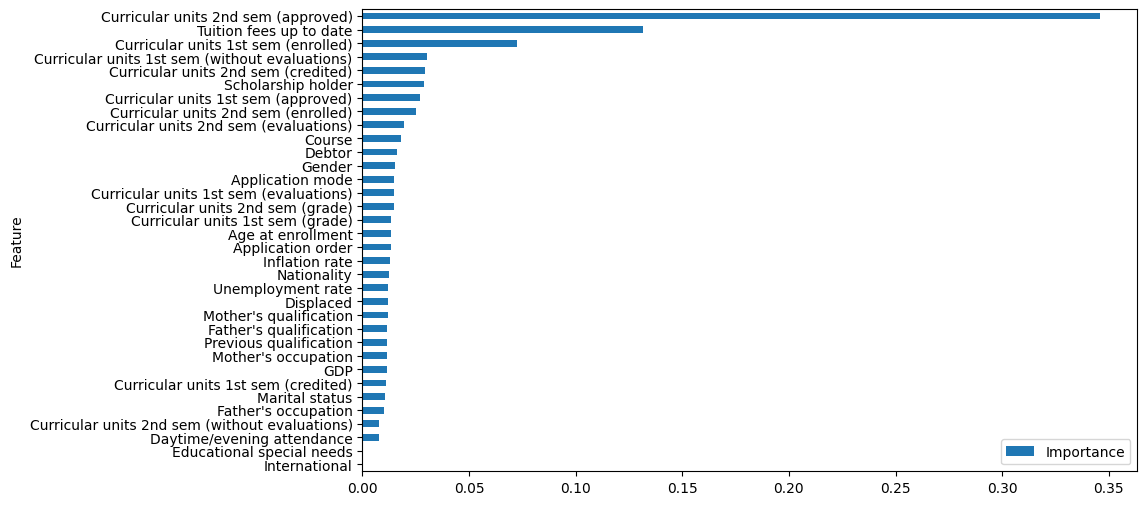

In [ ]:
# avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': xgb.feature_importances_})
feature_importance = feature_importance.sort_values('Importance',
                                                    ascending= True)
feature_importance.plot(x='Feature', y='Importance',
                        kind='barh', figsize=(10,6))

This is very interesting. This is the first time we get features that have *zero* importance! Let's remove thse two along with the two following with the least importance: ['International', 'Educational special needs', 'Daytime/evening attendance', 'Curricular units 2nd sem (without evaluations)']

In [ ]:
df_improved = df.drop(['International', 'Educational special needs',
                       'Daytime/evening attendance',
                       'Curricular units 2nd sem (without evaluations)'],
                      axis=1)

In [ ]:
X = df_improved.drop(columns = ['Target'])
y = df_improved['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9022038567493113

This bumps up our accuracy score with ca 0.02! Let's do hyperparameter tuning using RandomizedSearchCV:

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'max_depth': stats.randint(3, 10),
    'eta': stats.uniform(0.01, 0.1), #also known as learning rate
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
    #'objective': 'binary:hinge'
}

In [ ]:
# best_score = 0
# while best_score < 0.91:
#   xgb = XGBClassifier()
#   random_search = RandomizedSearchCV(xgb, param_distributions=param_dist,
#       n_iter=10, cv=5)
#   random_search.fit(X_train, y_train)
#   cv_score = random_search.best_score_
#   if cv_score > best_score:
#     best_score = cv_score

In [ ]:
# print("Best set of hyperparameters: ", random_search.best_params_)
# print("Best score: ", random_search.best_score_)

In [ ]:
# random_search.best_estimator_

In [ ]:
# The following is for a classifier with a score of 0.9101
best_params = {'eta': 0.05559020510992926, 'max_depth': 5,
               'n_estimators': 151, 'subsample': 0.7780292353532533}

In [ ]:
# The following is for a classifier with a score of 0.9105
best_params = {'eta': 0.08483558536657397, 'max_depth': 3,
               'n_estimators': 176, 'subsample': 0.8052733775077123}

In [ ]:
xgb = XGBClassifier(eta=0.08483558536657397, max_depth=3,
                    n_estimators=176,
                    subsample= 0.8052733775077123)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.08483558536657397,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=176, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9022038567493113

We just can't seem to surpass this value haha. Let's move on

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

<Axes: >

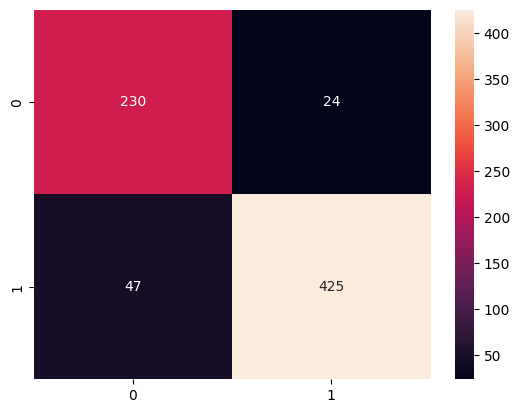

In [ ]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = 'g')

In [ ]:
print("Classification report with default threshold 0.5:",
      metrics.classification_report(y_test, y_pred, digits=4), sep='\n')

Classification report with default threshold 0.5:
              precision    recall  f1-score   support

           0     0.9055    0.8303    0.8663       277
           1     0.9004    0.9465    0.9229       449

    accuracy                         0.9022       726
   macro avg     0.9030    0.8884    0.8946       726
weighted avg     0.9024    0.9022    0.9013       726



In [ ]:
# # Evaluation metrics for default threshold
# print("Evaluation metrics with threshold 0.5:")
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1 score:", f1_score(y_test, y_pred))

In [ ]:
max_acc = 0
best_threshold = 0
for i in np.arange(0,2,0.05):
  y_pred_temp = xgb.predict_proba(X_test)
  y_pred_temp = [1 if x[1] > float("{:.2f}".format(i)) else 0 for x in y_pred_temp]
  acc = accuracy_score(y_pred_temp, y_test)
  if acc > max_acc:
    max_acc = acc
    best_threshold = i
print(f"Maximum accuracy from threshold tweaking: {max_acc} with threshold {float('{:.2f}'.format(best_threshold))}")

Maximum accuracy from threshold tweaking: 0.90633608815427 with threshold 0.35


<Axes: >

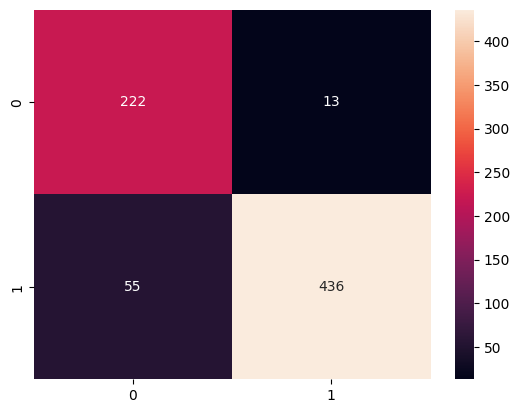

In [ ]:
y_pred_best_threshold = xgb.predict_proba(X_test)
y_pred_best_threshold = [1 if x[1] > best_threshold else 0 for x in y_pred_best_threshold]
sns.heatmap(confusion_matrix(y_pred_best_threshold, y_test), annot = True, fmt = 'g')

In [ ]:
np.random.seed(42)
cv_acc_score_xgb = round(np.mean(cross_val_score(xgb, X, y, cv=5))*100, 2)
print(f"Classification report for XGBoost with the optimal threshold {best_threshold:.2f}:",
      metrics.classification_report(y_test, y_pred_best_threshold, digits=4),
      f"\nCross-validated accuracy of the classifier: {cv_acc_score_xgb}%",
      sep='\n')

Classification report for XGBoost with the optimal threshold 0.35:
              precision    recall  f1-score   support

           0     0.9447    0.8014    0.8672       277
           1     0.8880    0.9710    0.9277       449

    accuracy                         0.9063       726
   macro avg     0.9163    0.8862    0.8974       726
weighted avg     0.9096    0.9063    0.9046       726


Cross-validated accuracy of the classifier: 90.99%


In [ ]:
print("Classification report with default threshold 0.5:",
      metrics.classification_report(y_test, y_pred, digits=4), sep='\n')

Classification report with default threshold 0.5:
              precision    recall  f1-score   support

           0     0.9055    0.8303    0.8663       277
           1     0.9004    0.9465    0.9229       449

    accuracy                         0.9022       726
   macro avg     0.9030    0.8884    0.8946       726
weighted avg     0.9024    0.9022    0.9013       726



Area Under the ROC Curve for threshold 0.5: 0.9519751071374012
Area Under the ROC Curve for threshold 0.35: 0.886245406961318


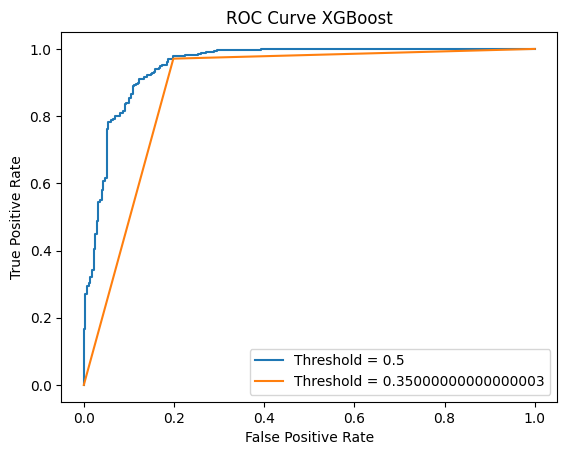

In [ ]:
# ROC Curve
y_scores = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')
print('Area Under the ROC Curve for threshold 0.5:',
      roc_auc_score(y_test, y_scores))

# For our newer better threshold
auc_score_xgb = roc_auc_score(y_test, y_pred_best_threshold)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_best_threshold)
print(f'Area Under the ROC Curve for threshold {best_threshold:.2f}:',
      auc_score_xgb)
plt.plot(fpr_, tpr_, label = f'Threshold = {best_threshold}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGBoost')
plt.legend()
plt.show()

In [ ]:
X_final_test = df_test.drop(['International', 'Educational special needs',
                       'Daytime/evening attendance',
                       'Curricular units 2nd sem (without evaluations)'],
                      axis=1)

predictions = xgb.predict(X_final_test)
predictions = predictions.reshape(-1,1)
predictions

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [ ]:
df_results_all['Prediction_XGBoost'] = predictions
df_results_all.Prediction_XGBoost.replace({0 : 'Dropout', 1 : 'Graduate'},
                                          inplace= True)

df_results_xgboost = df_test.copy()
df_results_xgboost['Prediction'] = predictions
df_results_xgboost.Prediction.replace({0 : 'Dropout', 1 : 'Graduate'},
                                      inplace= True)
df_results_xgboost

Marital status  Application mode  Application order  Course  \
0                 1                 9                  1      10   
1                 1                 1                  1      16   
2                 1                 9                  4      13   
3                 1                 1                  1      10   
4                 1                 1                  1       6   
..              ...               ...                ...     ...   
789               1                 3                  4      16   
790               1                 9                  2      16   
791               1                 1                  1       5   
792               1                14                  1       5   
793               1                14                  1       1   

     Daytime/evening attendance  Previous qualification  Nationality  \
0                             1                       1            1   
1                             1                       1            1   
2                             1                       1            1   
3                             1                       1            1   
4                             1                       1            1   
..                          ...                     ...          ...   
789                           1                       1            1   
790                           1                       1            1   
791                           1                       1            1   
792                           1                       1            1   
793                           1                       1            1   

     Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                        13                      28                    6  ...   
1                        13                      14                    8  ...   
2                         1                      28                    5  ...   
3                        13                      28                   10  ...   
4                        13                      14                    4  ...   
..                      ...                     ...                  ...  ...   
789                       3                      28                    4  ...   
790                       1                      14                    4  ...   
791                       1                      28                    6  ...   
792                      13                      14                    8  ...   
793                      22                       1                   10  ...   

     Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                      0                                    6   
1                                      0                                    7   
2                                      0                                    8   
3                                      0                                    6   
4                                      0                                    5   
..                                   ...                                  ...   
789                                    0                                    6   
790                                    0                                    6   
791                                    0                                    6   
792                                    2                                    6   
793                                    2                                    8   

     Curricular units 2nd sem (evaluations)  \
0                                        14   
1                                         8   
2                                         9   
3                                        12   
4                                         7   
..                                      ...   
789                                       9   
7

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Random Forest',
              'Gaussian NB',
              'Linear SVC',
              'XGBoost'
              ],
    'Cross-validated Accuracy Score': [cv_acc_score_logR, cv_acc_score_randf,
                       cv_acc_score_gaussian, cv_acc_score_svc,
                       cv_acc_score_xgb ],
    'AUC Score': [auc_score_logR, auc_score_randf, auc_score_gaussian,
                  auc_score_svc, auc_score_xgb]})
result_df = results.sort_values(by='Cross-validated Accuracy Score',
                                ascending=False)
result_df = result_df.set_index('Model')
result_df

Cross-validated Accuracy Score  AUC Score
Model                                                         
Linear SVC                                    91.21   0.899150
Logistic Regression                           91.18   0.898459
XGBoost                                       90.99   0.886245
Random Forest                                 90.33   0.889703
Gaussian NB                                   84.46   0.840508

In [ ]:
df_results_xgboost['Prediction'].value_counts()

Graduate    433
Dropout     361
Name: Prediction, dtype: int64

In [ ]:
df_results_logreg['Prediction'].value_counts()

Graduate    442
Dropout     352
Name: Prediction, dtype: int64

In [ ]:
df_results_randforest['Prediction'].value_counts()

Graduate    442
Dropout     352
Name: Prediction, dtype: int64

In [ ]:
df_results_gaussnb['Prediction'].value_counts()

Graduate    557
Dropout     237
Name: Prediction, dtype: int64

In [ ]:
df_results_linsvc['Prediction'].value_counts()

Graduate    450
Dropout     344
Name: Prediction, dtype: int64

These are our ratios. Let's look closer at Logistic Regression vs Random Forest since they have the same prediction ratio and seemingly the same predictions

In [ ]:
(df_results_logreg == df_results_randforest)['Prediction'].value_counts()

True     676
False    118
Name: Prediction, dtype: int64

Interesting!! They end up with the exact same ratio of Graduate VS Dropout but with 118 predictions that are different! Let's examine thse 118 students and see if we can find what makes them so hard to predict

In [ ]:
(df_results_logreg == df_results_randforest)['Prediction'].index

RangeIndex(start=0, stop=794, step=1)

In [ ]:
keys = (df_results_logreg == df_results_randforest)['Prediction'].index
values = list((df_results_logreg == df_results_randforest)['Prediction'])
predict_results = dict(zip(keys, values))
hard_to_predict_indices = [item[0] for item in predict_results.items() if item[1] == False]
hard_to_predict_indices

[11,
 12,
 17,
 30,
 33,
 38,
 41,
 54,
 56,
 59,
 61,
 70,
 81,
 106,
 113,
 119,
 125,
 131,
 138,
 146,
 150,
 172,
 174,
 175,
 178,
 184,
 189,
 190,
 192,
 205,
 209,
 221,
 230,
 232,
 238,
 246,
 256,
 258,
 259,
 272,
 275,
 289,
 291,
 294,
 305,
 313,
 320,
 321,
 335,
 343,
 358,
 362,
 364,
 365,
 368,
 371,
 373,
 376,
 379,
 384,
 387,
 389,
 399,
 408,
 412,
 413,
 417,
 418,
 431,
 434,
 442,
 446,
 449,
 455,
 458,
 460,
 479,
 480,
 482,
 483,
 490,
 493,
 498,
 518,
 525,
 528,
 534,
 536,
 543,
 546,
 560,
 574,
 579,
 580,
 581,
 584,
 596,
 606,
 612,
 623,
 624,
 639,
 661,
 690,
 691,
 699,
 707,
 722,
 727,
 729,
 737,
 743,
 745,
 761,
 770,
 774,
 776,
 782]

In [ ]:
# What we need to do now is extract the rows with these indices from any df:
df_results_logreg.loc[483]

Marital status                                           1
Application mode                                        16
Application order                                        1
Course                                                   9
Daytime/evening attendance                               1
Previous qualification                                   1
Nationality                                              1
Mother's qualification                                  13
Father's qualification                                  28
Mother's occupation                                     10
Father's occupation                                      9
Displaced                                                0
Educational special needs                                0
Debtor                                                   0
Tuition fees up to date                                  1
Gender                                                   1
Scholarship holder                                      

In [ ]:
df_results_randforest.loc[483]

Marital status                                          1
Application mode                                       16
Application order                                       1
Course                                                  9
Daytime/evening attendance                              1
Previous qualification                                  1
Nationality                                             1
Mother's qualification                                 13
Father's qualification                                 28
Mother's occupation                                    10
Father's occupation                                     9
Displaced                                               0
Educational special needs                               0
Debtor                                                  0
Tuition fees up to date                                 1
Gender                                                  1
Scholarship holder                                      0
Age at enrollm

As this confirms, this is a student that one model predicts is gonna graduate and one student predicts is gonna drop out

In [ ]:
hard_to_predict = df_test.loc[hard_to_predict_indices]
hard_to_predict

Marital status  Application mode  Application order  Course  \
11                1                 1                  3       2   
12                1                 8                  3       2   
17                1                 8                  1      11   
30                1                 1                  1       2   
33                1                12                  1       6   
..              ...               ...                ...     ...   
761               1                 1                  2       9   
770               1                 8                  1       7   
774               1                12                  1       4   
776               1                 6                  1       9   
782               4                12                  1      17   

     Daytime/evening attendance  Previous qualification  Nationality  \
11                            1                       1            1   
12                            1                       1            1   
17                            1                       1            1   
30                            1                       1            1   
33                            1                       1            1   
..                          ...                     ...          ...   
761                           1                       1            1   
770                           1                       1            1   
774                           1                       1            1   
776                           1                       1           12   
782                           0                       1            1   

     Mother's qualification  Father's qualification  Mother's occupation  ...  \
11                       23                      27                    5  ...   
12                        1                      27                    5  ...   
17                       13                      14                    5  ...   
30                        3                      27                    3  ...   
33                       22                      14                   10  ...   
..                      ...                     ...                  ...  ...   
761                      23                      28                   10  ...   
770                      22                       1                   10  ...   
774                      23                      14                   10  ...   
776                       1                       1                   10  ...   
782                      22                      28                   10  ...   

     Curricular units 1st sem (without evaluations)  \
11                                                0   
12                                                0   
17                                                0   
30                                                0   
33                                                1   
..                                              ...   
761                                               0   
770                                               0   
774                                               0   
776                                               0   
782                                               0   

     Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
11                                     0                                    0   
12                                     0                                    0   
17                                     0                                    5   
30                                     0                                    0   
33                                     0                                    5   
..                                   ...                                  ...   
761                                    0                                    5   
770                                    0 

All of our three classifiers agreed that Curricular units 2nd sem (Approved) is the singlehanded most important factor for graduating. Let's see how that value is for these students:

In [ ]:
hard_to_predict['Curricular units 2nd sem (approved)'].value_counts()

4     41
3     22
5     19
0     18
6      5
9      4
2      3
7      3
11     2
8      1
Name: Curricular units 2nd sem (approved), dtype: int64

Even in the Specification of Data file, we do not see what these values actually mean. But they are rather varied!<br>
Other factors that all three models agree are very important are:
*   Curricular units 1st sem (enrolled)
*   Curricular units 1st sem (approved)
*   Tuition fees up to date
*   Scholarship holder<br>
Since we do not know what the values for the Curricular unit features mean, we unfortunately can't really make any insightful inference from this



In [ ]:
hard_to_predict['Scholarship holder'].value_counts()

0    103
1     15
Name: Scholarship holder, dtype: int64

In [ ]:
hard_to_predict['Tuition fees up to date'].value_counts()

1    109
0      9
Name: Tuition fees up to date, dtype: int64

In [ ]:
fig = px.sunburst(hard_to_predict,
                  path = ['Scholarship holder', 'Tuition fees up to date',
                          'Curricular units 2nd sem (approved)',
                          'Curricular units 1st sem (enrolled)'],
                  width=700, height=600)
fig.update_traces(textinfo="label+value")
fig.show()

Let's compare this same Sunburst chart with students that all three model thinks are going to graduate and the same with drop out

In [ ]:
df_results_all

Marital status  Application mode  Application order  Course  \
0                 1                 9                  1      10   
1                 1                 1                  1      16   
2                 1                 9                  4      13   
3                 1                 1                  1      10   
4                 1                 1                  1       6   
..              ...               ...                ...     ...   
789               1                 3                  4      16   
790               1                 9                  2      16   
791               1                 1                  1       5   
792               1                14                  1       5   
793               1                14                  1       1   

     Daytime/evening attendance  Previous qualification  Nationality  \
0                             1                       1            1   
1                             1                       1            1   
2                             1                       1            1   
3                             1                       1            1   
4                             1                       1            1   
..                          ...                     ...          ...   
789                           1                       1            1   
790                           1                       1            1   
791                           1                       1            1   
792                           1                       1            1   
793                           1                       1            1   

     Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                        13                      28                    6  ...   
1                        13                      14                    8  ...   
2                         1                      28                    5  ...   
3                        13                      28                   10  ...   
4                        13                      14                    4  ...   
..                      ...                     ...                  ...  ...   
789                       3                      28                    4  ...   
790                       1                      14                    4  ...   
791                       1                      28                    6  ...   
792                      13                      14                    8  ...   
793                      22                       1                   10  ...   

     Curricular units 2nd sem (grade)  \
0                           11.000000   
1                           13.500000   
2                           11.425000   
3                           11.000000   
4                           13.000000   
..                                ...   
789                         11.666667   
790                         13.000000   
791                         11.333333   
792                         12.200000   
793                         13.000000   

     Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                                 0               10.8   
1                                                 0               16.2   
2                                                 0               12.7   
3                                                 0                7.6   
4                                                 0                9.4   
..                                              ...                ...   
789                                               0                9.4   
790                                               0               10.8   
791                                               0               10.8   
792                                               0               13.9   
793                                        

In [ ]:
certain_graduate = df_results_all.loc[(df_results_all['Prediction_Logreg'] == 'Graduate') & (df_results_all['Prediction_Randforest'] == 'Graduate') & (df_results_all['Prediction_GaussianNB'] == 'Graduate') & (df_results_all['Prediction_LinearSVC'] == 'Graduate') & (df_results_all['Prediction_XGBoost'] == 'Graduate')]
certain_graduate

Marital status  Application mode  Application order  Course  \
1                 1                 1                  1      16   
2                 1                 9                  4      13   
3                 1                 1                  1      10   
4                 1                 1                  1       6   
5                 1                 8                  2      12   
..              ...               ...                ...     ...   
785               1                 1                  1      10   
787               2                 4                  1      12   
788               1                 1                  1       9   
790               1                 9                  2      16   
792               1                14                  1       5   

     Daytime/evening attendance  Previous qualification  Nationality  \
1                             1                       1            1   
2                             1                       1            1   
3                             1                       1            1   
4                             1                       1            1   
5                             1                       1            1   
..                          ...                     ...          ...   
785                           1                       1            1   
787                           1                       3            1   
788                           1                       1            1   
790                           1                       1            1   
792                           1                       1            1   

     Mother's qualification  Father's qualification  Mother's occupation  ...  \
1                        13                      14                    8  ...   
2                         1                      28                    5  ...   
3                        13                      28                   10  ...   
4                        13                      14                    4  ...   
5                         3                       3                    2  ...   
..                      ...                     ...                  ...  ...   
785                      22                      27                    8  ...   
787                      22                      27                   10  ...   
788                      22                       1                    5  ...   
790                       1                      14                    4  ...   
792                      13                      14                    8  ...   

     Curricular units 2nd sem (grade)  \
1                           13.500000   
2                           11.425000   
3                           11.000000   
4                           13.000000   
5                           13.716667   
..                                ...   
785                         10.833333   
787                         12.063750   
788                         11.000000   
790                         13.000000   
792                         12.200000   

     Curricular units 2nd sem (without evaluations)  Unemployment rate  \
1                                                 0               16.2   
2                                                 0               12.7   
3                                                 0                7.6   
4                                                 0                9.4   
5                                                 0               16.2   
..                                              ...                ...   
785                                               0                7.6   
787                                               0               15.5   
788                                               0               10.8   
790                                               0               10.8   
792                                        

In [ ]:
certain_graduate['Curricular units 2nd sem (approved)'].value_counts()

5     107
6      80
4      66
7      39
8      11
10      6
9       6
3       5
11      2
12      2
Name: Curricular units 2nd sem (approved), dtype: int64

In [ ]:
fig = px.sunburst(certain_graduate,
                  path = ['Scholarship holder', 'Tuition fees up to date',
                          'Curricular units 2nd sem (approved)',
                          'Curricular units 1st sem (enrolled)'],
                  width=700, height=600)
fig.update_traces(textinfo="label+value")
fig.show()

In [ ]:
certain_dropout = df_results_all.loc[(df_results_all['Prediction_Logreg'] == 'Dropout') & (df_results_all['Prediction_Randforest'] == 'Dropout') & (df_results_all['Prediction_GaussianNB'] == 'Dropout') & (df_results_all['Prediction_LinearSVC'] == 'Dropout') & (df_results_all['Prediction_XGBoost'] == 'Dropout')]
certain_dropout

Marital status  Application mode  Application order  Course  \
7                 1                 1                  1       9   
8                 1                 8                  1      17   
14                1                14                  1       5   
16                1                 8                  1       9   
19                1                14                  2       7   
..              ...               ...                ...     ...   
766               1                15                  1       2   
771               1                 1                  1       6   
775               1                 1                  6       7   
779               1                 1                  2      15   
786               1                 1                  2      10   

     Daytime/evening attendance  Previous qualification  Nationality  \
7                             1                       1            1   
8                             0                       1            1   
14                            1                       1            1   
16                            1                       1            1   
19                            1                       1            1   
..                          ...                     ...          ...   
766                           1                      14            1   
771                           1                       1            1   
775                           1                       1            1   
779                           1                       1            1   
786                           1                       1            1   

     Mother's qualification  Father's qualification  Mother's occupation  ...  \
7                         1                       1                    5  ...   
8                        23                      28                    5  ...   
14                        1                       1                    4  ...   
16                       23                      27                    6  ...   
19                       23                      14                   10  ...   
..                      ...                     ...                  ...  ...   
766                       1                       1                   10  ...   
771                       3                       1                    5  ...   
775                       2                       1                    4  ...   
779                      22                      27                   10  ...   
786                       1                      14                    5  ...   

     Curricular units 2nd sem (grade)  \
7                           13.500000   
8                           14.333333   
14                           0.000000   
16                           0.000000   
19                           0.000000   
..                                ...   
766                          0.000000   
771                          0.000000   
775                         10.000000   
779                         17.000000   
786                          0.000000   

     Curricular units 2nd sem (without evaluations)  Unemployment rate  \
7                                                 0                8.9   
8                                                 1                7.6   
14                                                0               12.7   
16                                                0                7.6   
19                                                0               15.5   
..                                              ...                ...   
766                                               0               15.5   
771                                               0               12.4   
775                                               3                7.6   
779                                               0                9.4   
786                                        

In [ ]:
certain_dropout['Curricular units 2nd sem (approved)'].value_counts()

0    48
3    30
2    23
1    20
4    13
6     3
5     2
8     1
Name: Curricular units 2nd sem (approved), dtype: int64

In [ ]:
fig = px.sunburst(certain_dropout,
                  path = ['Scholarship holder', 'Tuition fees up to date',
                          'Curricular units 2nd sem (approved)',
                          'Curricular units 1st sem (enrolled)'],
                  width=700, height=600)
fig.update_traces(textinfo="label+value")
fig.show()

Let's look at how our findings fit in to the 70 year old!

In [ ]:
df.loc[565]

Marital status                                     4.00
Application mode                                  12.00
Application order                                  2.00
Course                                             9.00
Daytime/evening attendance                         1.00
Previous qualification                            12.00
Nationality                                        1.00
Mother's qualification                            22.00
Father's qualification                            27.00
Mother's occupation                               10.00
Father's occupation                                8.00
Displaced                                          0.00
Educational special needs                          0.00
Debtor                                             1.00
Tuition fees up to date                            0.00
Gender                                             1.00
Scholarship holder                                 0.00
Age at enrollment                               

It becomes quite apparent why unfortunately this 70 year champ did not graduate. He did not pass the curricular units of the 2nd semester. In fact, he didn't even pass the ones of the 1st semester :(( He did not have a scholarship. His tuition fees were unfortunately not up to date. And on top of that, he was in debt. Still a delight to see him applying!